In [1361]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [1362]:
# Load data
df = pd.read_csv('data/gym_members_exercise_tracking.csv')
df2 = pd.read_csv('data/gym_membership.csv')
df3 = pd.read_csv("data/gym_churn_us.csv")
df4 = pd.read_csv("data/megaGymDataset.csv")
df5 = pd.read_csv("data\com_corp_mta.csv")

In [1363]:
# Data Summary
print(df.info())
print(df.describe())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [1364]:
# Data Summary
#print(df2.info())
#print(df2.describe())

In [1365]:
# Data Summary
#print(df3.info())
#print(df3.describe())

In [1366]:
# Data Summary
#print(df4.info())
#print(df4.describe())

In [1367]:
# Data Summary
print(df5.info())
print(df5.describe())
df5.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Tiempo                     686 non-null    object 
 1   Peso                       412 non-null    object 
 2   Cambio                     412 non-null    object 
 3   IMC                        412 non-null    float64
 4   Grasa corporal             412 non-null    object 
 5   Masa muscular esquelética  412 non-null    object 
 6   Masa ósea                  412 non-null    object 
 7   Agua corporal              412 non-null    object 
 8   Unnamed: 8                 0 non-null      float64
dtypes: float64(2), object(7)
memory usage: 48.4+ KB
None
              IMC  Unnamed: 8
count  412.000000         0.0
mean    26.568932         NaN
std      0.990910         NaN
min     24.700000         NaN
25%     25.700000         NaN
50%     26.500000         NaN
75%     27.3

,Tiempo,Peso,Cambio,IMC,Grasa corporal,Masa muscular esquelética,Masa ósea,Agua corporal,Unnamed: 8
0,"Oct 29, 2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7:06 am,75.6 kg,0.2 kg,25.6,15.4 %,29.8 kg,4.7 kg,61.7 %,NaN
2,"Oct 28, 2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6:19 am,75.4 kg,0.7 kg,25.5,14.7 %,29.7 kg,4.7 kg,62.3 %,NaN
4,"Oct 27, 2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1368]:
# Convert columns to string and handle NaN
numeric_columns = ['Peso', 'Cambio']

for col in numeric_columns:
    # Convert to string
    df5[col] = df5[col].astype(str)
    
    # Replace unwanted characters and convert to float
    df5[col] = df5[col].str.replace(' kg', '').str.replace(',', '.')
    
    # Convert to float (this will automatically handle NaN)
    df5[col] = pd.to_numeric(df5[col], errors='coerce')

# Show the resulting DataFrame
print(df5.info())
print(df5.describe())
df5.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Tiempo                     686 non-null    object 
 1   Peso                       412 non-null    float64
 2   Cambio                     412 non-null    float64
 3   IMC                        412 non-null    float64
 4   Grasa corporal             412 non-null    object 
 5   Masa muscular esquelética  412 non-null    object 
 6   Masa ósea                  412 non-null    object 
 7   Agua corporal              412 non-null    object 
 8   Unnamed: 8                 0 non-null      float64
dtypes: float64(4), object(5)
memory usage: 48.4+ KB
None
             Peso      Cambio         IMC  Unnamed: 8
count  412.000000  412.000000  412.000000         0.0
mean    78.600000    0.531553   26.568932         NaN
std      2.933256    0.434212    0.990910         NaN
min   

,Tiempo,Peso,Cambio,IMC,Grasa corporal,Masa muscular esquelética,Masa ósea,Agua corporal,Unnamed: 8
0,"Oct 29, 2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7:06 am,75.6,0.2,25.6,15.4 %,29.8 kg,4.7 kg,61.7 %,NaN
2,"Oct 28, 2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6:19 am,75.4,0.7,25.5,14.7 %,29.7 kg,4.7 kg,62.3 %,NaN
4,"Oct 27, 2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1369]:
# Delete the column Unnamed: 8
df5.drop(columns=['Unnamed: 8'], inplace=True)

# Convert the Tiempo column to datetime
df5['Tiempo'] = pd.to_datetime(df5['Tiempo'], errors='coerce')

# Shift the values in the Tiempo column downwards
df5['Tiempo'] = df5['Tiempo'].shift(1)

# Function to clean and convert columns to float64
def clean_and_convert(column):
    return pd.to_numeric(column.str.replace(' kg', '').str.replace(' %', '').str.replace(',', '.'), errors='coerce')

# Clean and convert the specific columns
columns_to_convert = ['Grasa corporal', 
                       'Masa muscular esquelética', 
                       'Masa ósea', 
                       'Agua corporal']

for col in columns_to_convert:
    df5[col] = df5[col].astype(str)  # Ensure they are strings
    df5[col] = clean_and_convert(df5[col])  # Apply cleaning and conversion

# Show the resulting DataFrame
print(df5.info())
print(df5.describe())
df5.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Tiempo                     188 non-null    datetime64[ns]
 1   Peso                       412 non-null    float64       
 2   Cambio                     412 non-null    float64       
 3   IMC                        412 non-null    float64       
 4   Grasa corporal             412 non-null    float64       
 5   Masa muscular esquelética  412 non-null    float64       
 6   Masa ósea                  412 non-null    float64       
 7   Agua corporal              412 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 43.0 KB
None
                              Tiempo        Peso      Cambio         IMC  \
count                            188  412.000000  412.000000  412.000000   
mean   2024-06-17 12:07:39.574468096   78.600000 

,Tiempo,Peso,Cambio,IMC,Grasa corporal,Masa muscular esquelética,Masa ósea,Agua corporal
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-10-29,75.6,0.2,25.6,15.4,29.8,4.7,61.7
2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-10-28,75.4,0.7,25.5,14.7,29.7,4.7,62.3
4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1370]:
# Delete rows that contain NaN
df5 = df5.dropna()


In [1371]:
df5.info()
df5.head()

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, 1 to 685
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Tiempo                     188 non-null    datetime64[ns]
 1   Peso                       188 non-null    float64       
 2   Cambio                     188 non-null    float64       
 3   IMC                        188 non-null    float64       
 4   Grasa corporal             188 non-null    float64       
 5   Masa muscular esquelética  188 non-null    float64       
 6   Masa ósea                  188 non-null    float64       
 7   Agua corporal              188 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 13.2 KB


,Tiempo,Peso,Cambio,IMC,Grasa corporal,Masa muscular esquelética,Masa ósea,Agua corporal
1,2024-10-29,75.6,0.2,25.6,15.4,29.8,4.7,61.7
3,2024-10-28,75.4,0.7,25.5,14.7,29.7,4.7,62.3
5,2024-10-27,76.1,0.1,25.7,15.4,29.9,4.7,61.8
7,2024-10-26,76.2,0.5,25.7,15.5,29.9,4.7,61.7
9,2024-10-25,75.7,0.2,25.6,15.0,29.8,4.7,62.1


In [1372]:
# Rename columns
df5.rename(columns={
    'Tiempo': 'Date',
    'Peso': 'Weight_kg',
    'IMC': 'BMI',
    'Grasa corporal': 'Fat_Percentage',
    'Masa muscular esquelética': 'Muscle_mass_kg',
    'Masa ósea': 'Bone_mass_kg',
    'Agua corporal': 'Body_water_Percentage'
}, inplace=True)

# Delete the "Change" column
df5.drop(columns=['Cambio'], inplace=True)

# Display the modified DataFrame
print(df5)
df5.info()
df5.head()


          Date  Weight_kg   BMI  Fat_Percentage  Muscle_mass_kg  Bone_mass_kg  \
1   2024-10-29       75.6  25.6            15.4            29.8           4.7   
3   2024-10-28       75.4  25.5            14.7            29.7           4.7   
5   2024-10-27       76.1  25.7            15.4            29.9           4.7   
7   2024-10-26       76.2  25.7            15.5            29.9           4.7   
9   2024-10-25       75.7  25.6            15.0            29.8           4.7   
..         ...        ...   ...             ...             ...           ...   
677 2023-11-10       80.0  27.0            25.7            31.6           4.2   
679 2023-11-07       79.8  27.0            26.3            31.6           4.2   
681 2023-11-05       79.8  27.0            25.9            31.6           4.2   
683 2023-11-02       79.4  26.9            25.7            31.5           4.2   
685 2023-11-01       79.2  26.8            26.0            31.4           4.1   

     Body_water_Percentage 

,Date,Weight_kg,BMI,Fat_Percentage,Muscle_mass_kg,Bone_mass_kg,Body_water_Percentage
1,2024-10-29,75.6,25.6,15.4,29.8,4.7,61.7
3,2024-10-28,75.4,25.5,14.7,29.7,4.7,62.3
5,2024-10-27,76.1,25.7,15.4,29.9,4.7,61.8
7,2024-10-26,76.2,25.7,15.5,29.9,4.7,61.7
9,2024-10-25,75.7,25.6,15.0,29.8,4.7,62.1


In [1373]:
# Save to a new csv
df5.to_csv('data\com_corp_mta_cleaned.csv', index=False)

In [1374]:
# Adjust outliers by linear interpolation (or you could set manually to an approximate value)
df6 = pd.read_csv("data\com_corp_mta_cleaned.csv")
df6['Fat_Percentage'] = df6['Fat_Percentage'].interpolate(method='linear')

In [1375]:
# Apply condition to correct values in the specified date range
mask = (df6['Date'] >= '2024-04-28') & (df6['Date'] <= '2024-07-08')
df6.loc[mask, 'Muscle_mass_kg'] = 31  # Adjust all these values to 31 kg

In [1376]:
# Save corrected data
df6['Date'] = pd.to_datetime(df6['Date'], errors='coerce')


In [1377]:

df6.to_csv('data\com_corp_mta_corrected.csv', index=False)
df7 =  pd.read_csv('data\com_corp_mta_corrected.csv')
df7['Date'] = pd.to_datetime(df7['Date'], errors='coerce')
print(df7.info())
df7.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   188 non-null    datetime64[ns]
 1   Weight_kg              188 non-null    float64       
 2   BMI                    188 non-null    float64       
 3   Fat_Percentage         188 non-null    float64       
 4   Muscle_mass_kg         188 non-null    float64       
 5   Bone_mass_kg           188 non-null    float64       
 6   Body_water_Percentage  188 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 10.4 KB
None


,Date,Weight_kg,BMI,Fat_Percentage,Muscle_mass_kg,Bone_mass_kg,Body_water_Percentage
0,2024-10-29,75.6,25.6,15.4,29.8,4.7,61.7
1,2024-10-28,75.4,25.5,14.7,29.7,4.7,62.3
2,2024-10-27,76.1,25.7,15.4,29.9,4.7,61.8
3,2024-10-26,76.2,25.7,15.5,29.9,4.7,61.7
4,2024-10-25,75.7,25.6,15.0,29.8,4.7,62.1


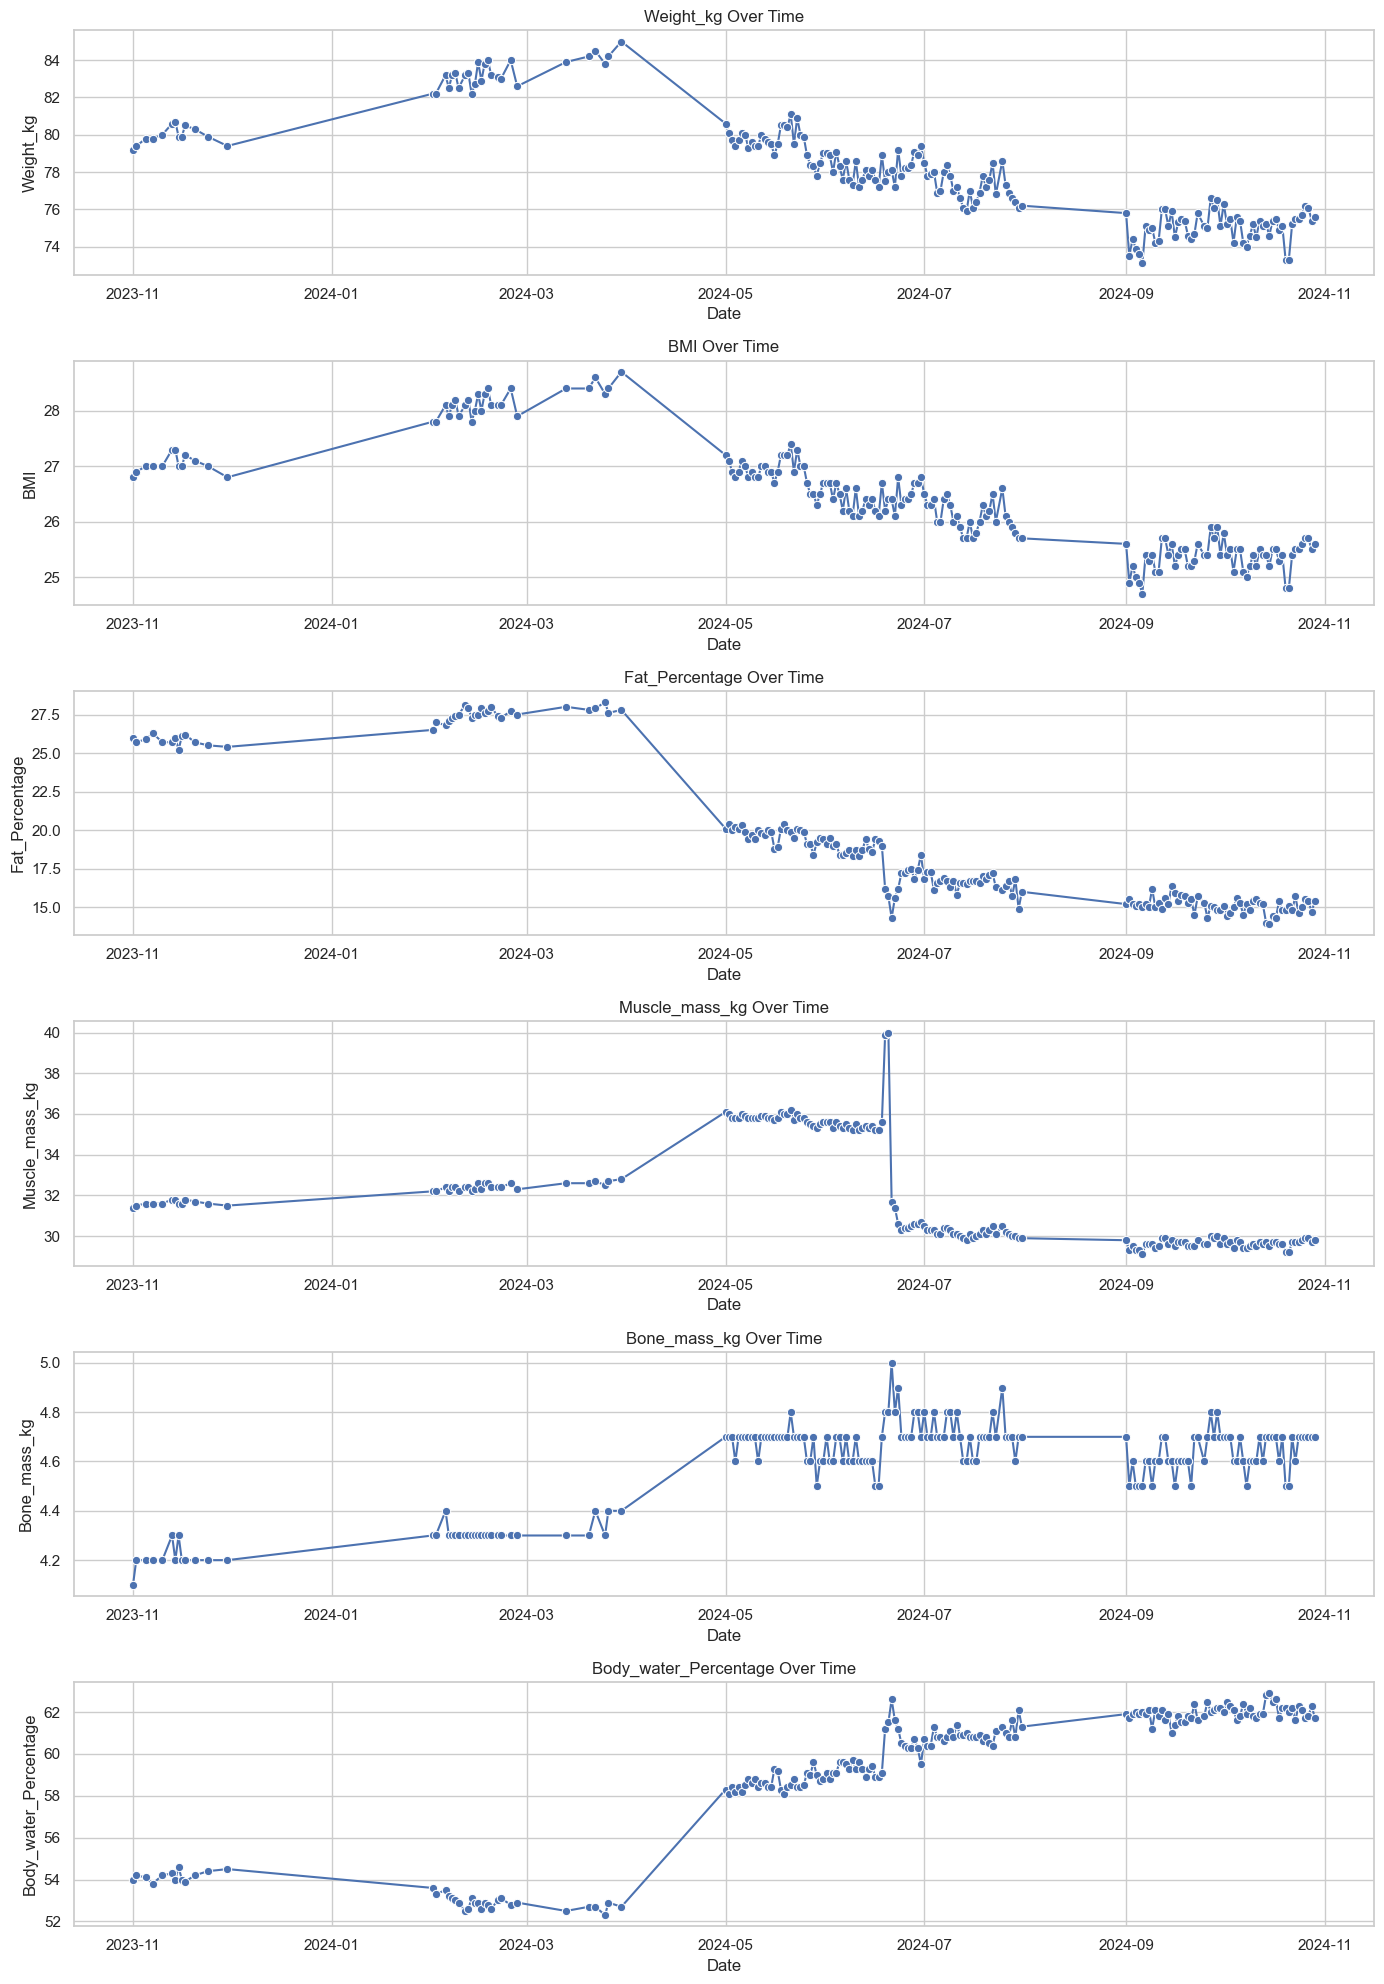

In [1378]:
'''
# 2. Plotting Weight, BMI, Fat Percentage over Time
plt.figure(figsize=(14, 8))
plt.plot(df5['Date'], df5['Weight_kg'], marker='o', color='b', label='Weight (kg)')
plt.plot(df5['Date'], df5['BMI'], marker='x', color='r', label='BMI')
plt.plot(df5['Date'], df5['Fat_Percentage'], marker='s', color='g', label='Fat Percentage (%)')
plt.title('Weight, BMI, and Fat Percentage Over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

# 3. Distribution Plots for Each Metric
metrics = ['Weight_kg', 'BMI', 'Fat_Percentage', 'Muscle_mass_kg', 'Bone_mass_kg', 'Body_water_Percentage']
plt.figure(figsize=(16, 12))
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df5[metric], kde=True, bins=10)
    plt.title(f'Distribution of {metric}')
plt.tight_layout()
plt.show()

# 4. Pair Plot to Examine Relationships Between Metrics
sns.pairplot(df5[metrics], kind='scatter', diag_kind='kde', plot_kws={'alpha': 0.7})
plt.suptitle("Pair Plot for Body Composition Metrics", y=1.02)
plt.show()

# 5. Correlation Heatmap
plt.figure(figsize=(10, 6))
correlation = df5[metrics].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

# 6. Box Plots for Identifying Outliers
plt.figure(figsize=(16, 12))
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df5[metric])
    plt.title(f'Box Plot of {metric}')
plt.tight_layout()
plt.show()
'''
# 7. Trend Analysis for Each Metric Over Time
metrics = ['Weight_kg', 'BMI', 'Fat_Percentage', 'Muscle_mass_kg', 'Bone_mass_kg', 'Body_water_Percentage']
fig, axes = plt.subplots(len(metrics), 1, figsize=(14, 20))
for i, metric in enumerate(metrics):
    sns.lineplot(x='Date', y=metric, data=df5, ax=axes[i], marker='o')
    axes[i].set_title(f'{metric} Over Time')
    axes[i].grid(True)

plt.tight_layout()
plt.show()


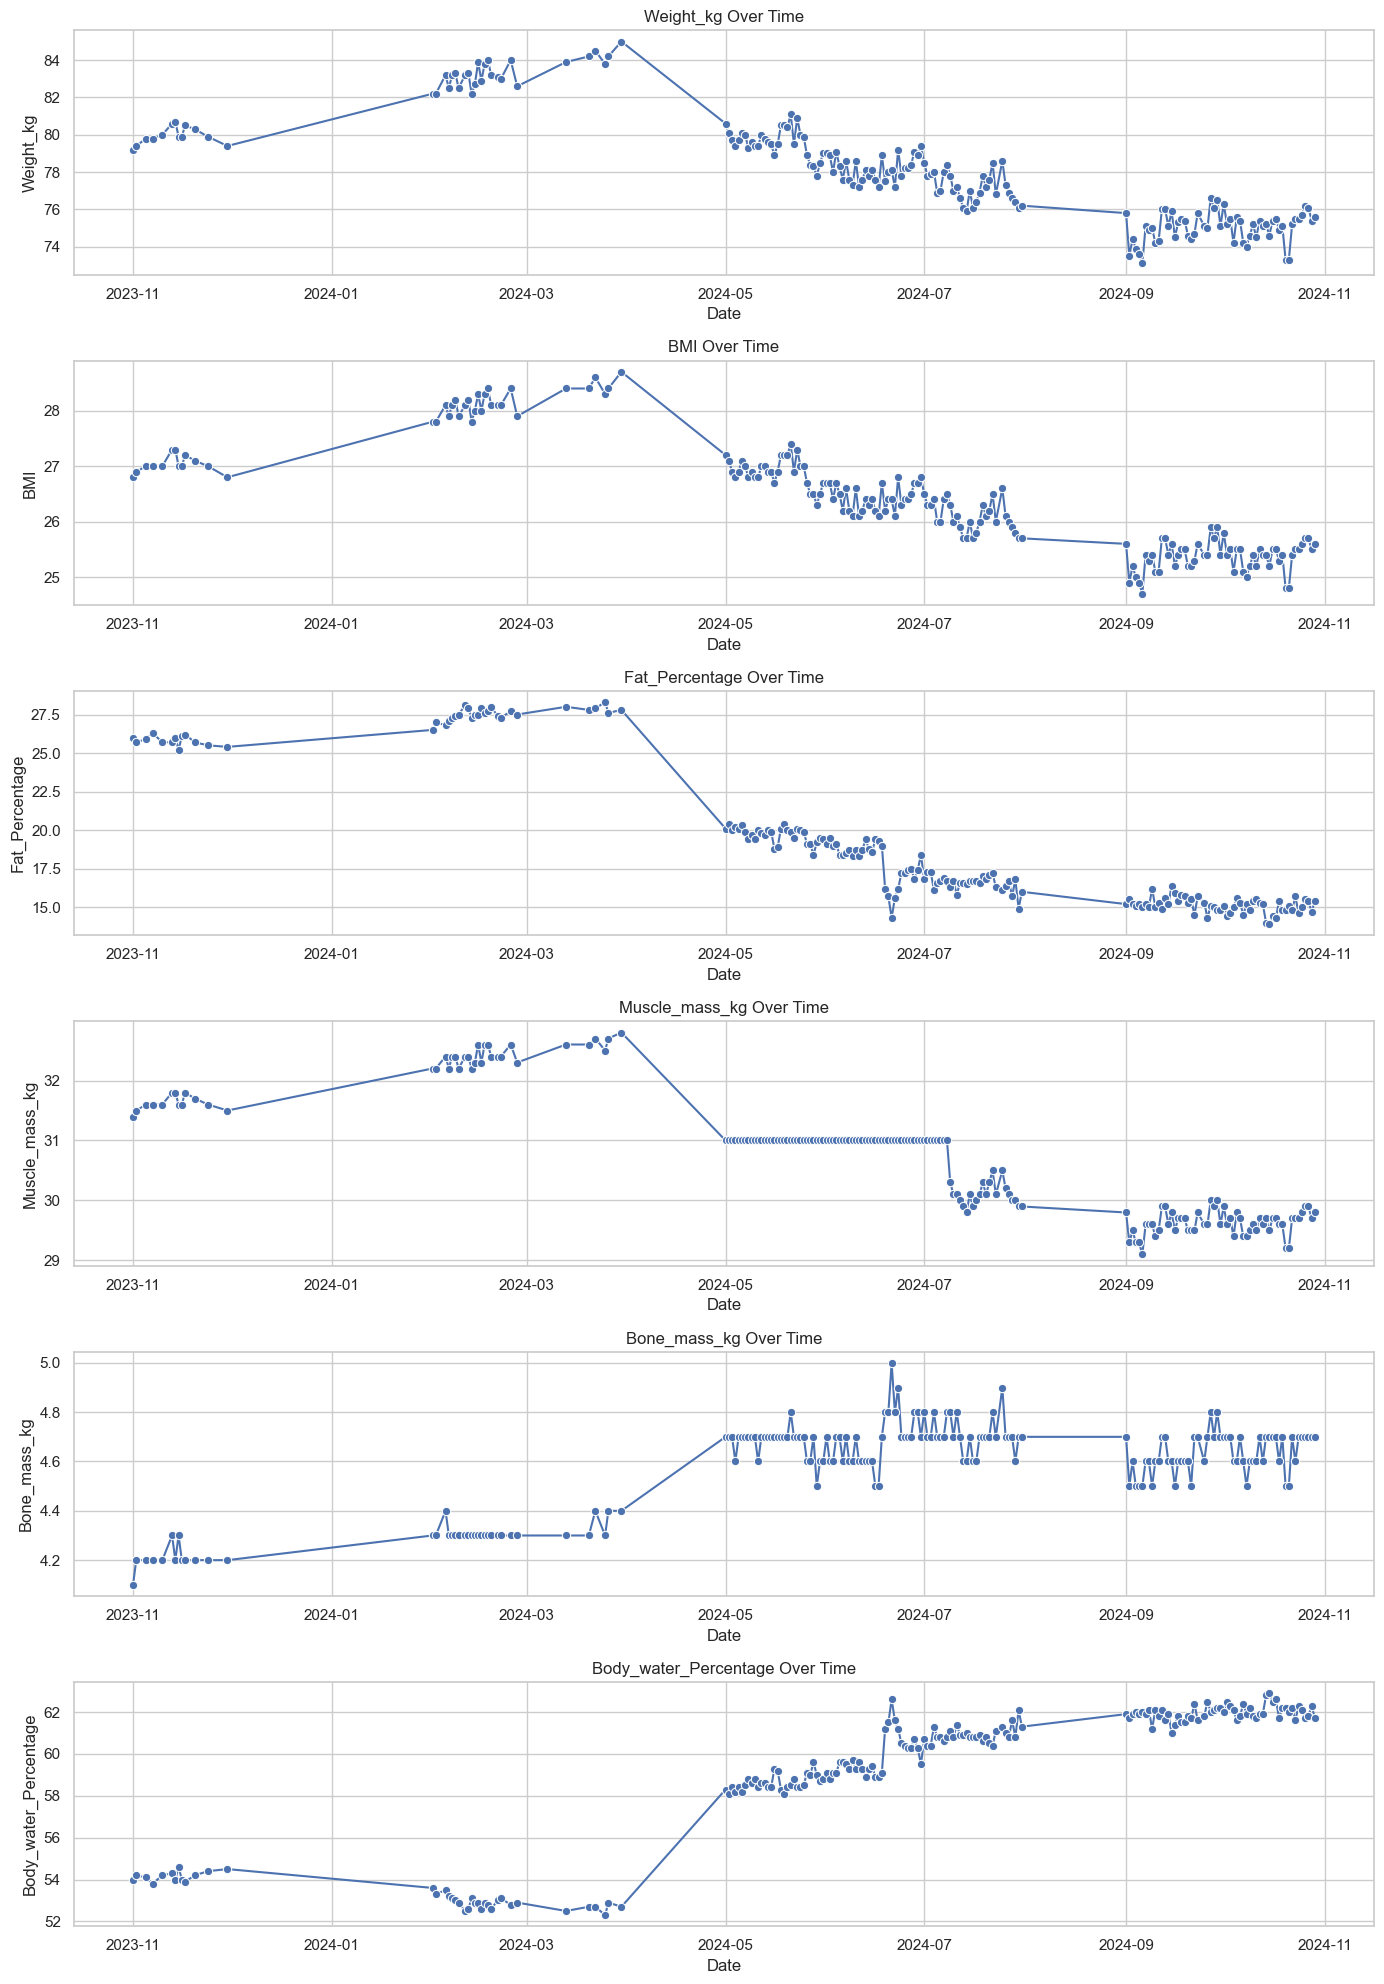

In [1379]:

fig, axes = plt.subplots(len(metrics), 1, figsize=(14, 20))
for i, metric in enumerate(metrics):
    sns.lineplot(x='Date', y=metric, data=df7, ax=axes[i], marker='o')
    axes[i].set_title(f'{metric} Over Time')
    axes[i].grid(True)

plt.tight_layout()
plt.show()


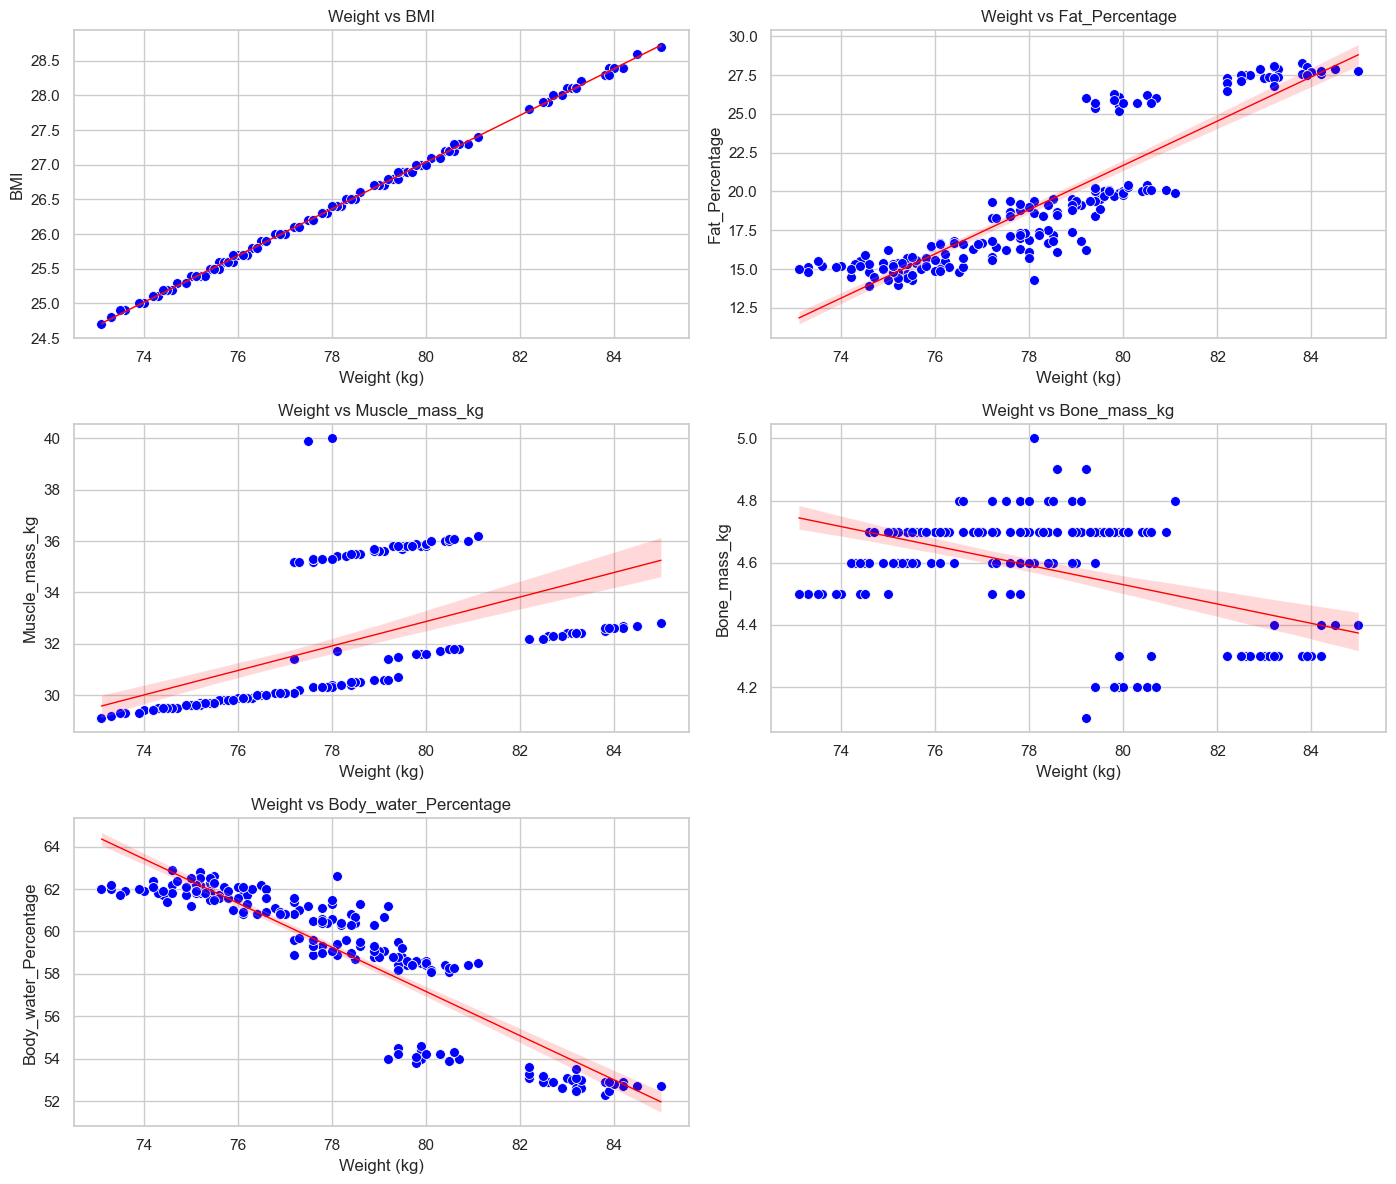

In [1380]:
# Compairing metrics
metrics_to_compare = ['BMI', 'Fat_Percentage', 'Muscle_mass_kg', 'Bone_mass_kg', 'Body_water_Percentage']

# Setting up the plot grid
plt.figure(figsize=(14, 12))
for i, metric in enumerate(metrics_to_compare, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(x='Weight_kg', y=metric, data=df5, color='blue', s=50)
    sns.regplot(x='Weight_kg', y=metric, data=df5, scatter=False, color='red', line_kws={"linewidth": 1})
    plt.title(f'Weight vs {metric}')
    plt.xlabel('Weight (kg)')
    plt.ylabel(metric)
    plt.grid(True)

plt.tight_layout()
plt.show()


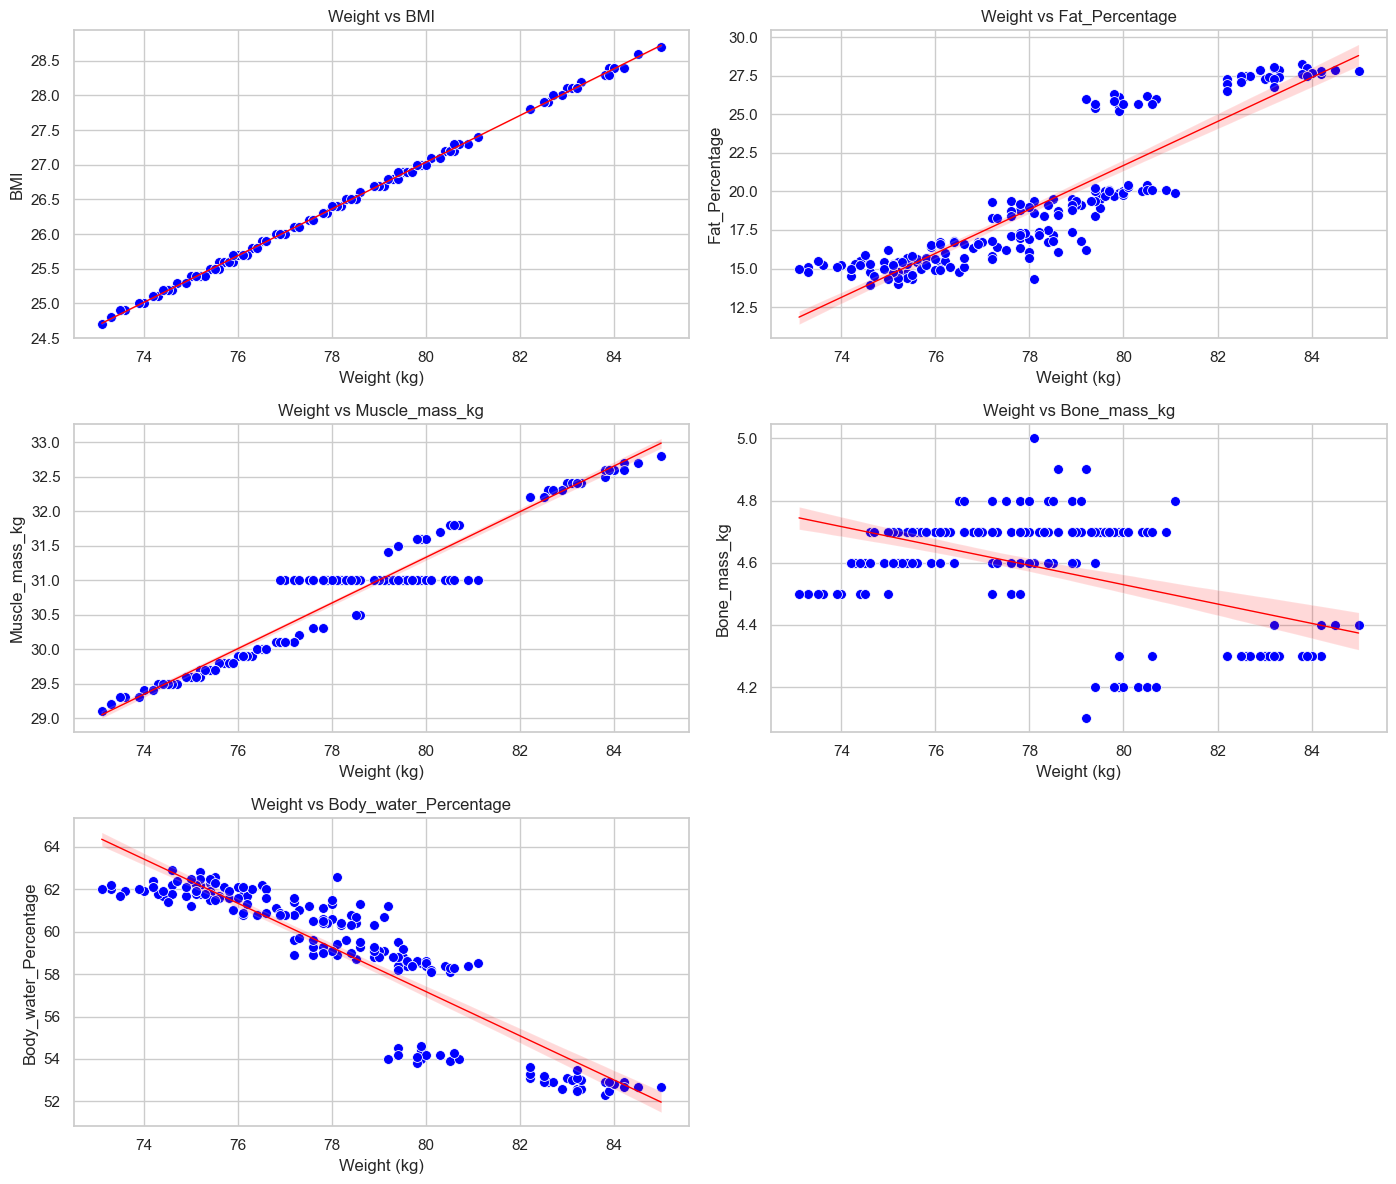

In [1381]:
# Compairing metrics
metrics_to_compare = ['BMI', 'Fat_Percentage', 'Muscle_mass_kg', 'Bone_mass_kg', 'Body_water_Percentage']

# Setting up the plot grid
plt.figure(figsize=(14, 12))
for i, metric in enumerate(metrics_to_compare, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(x='Weight_kg', y=metric, data=df7, color='blue', s=50)
    sns.regplot(x='Weight_kg', y=metric, data=df7, scatter=False, color='red', line_kws={"linewidth": 1})
    plt.title(f'Weight vs {metric}')
    plt.xlabel('Weight (kg)')
    plt.ylabel(metric)
    plt.grid(True)

plt.tight_layout()
plt.show()

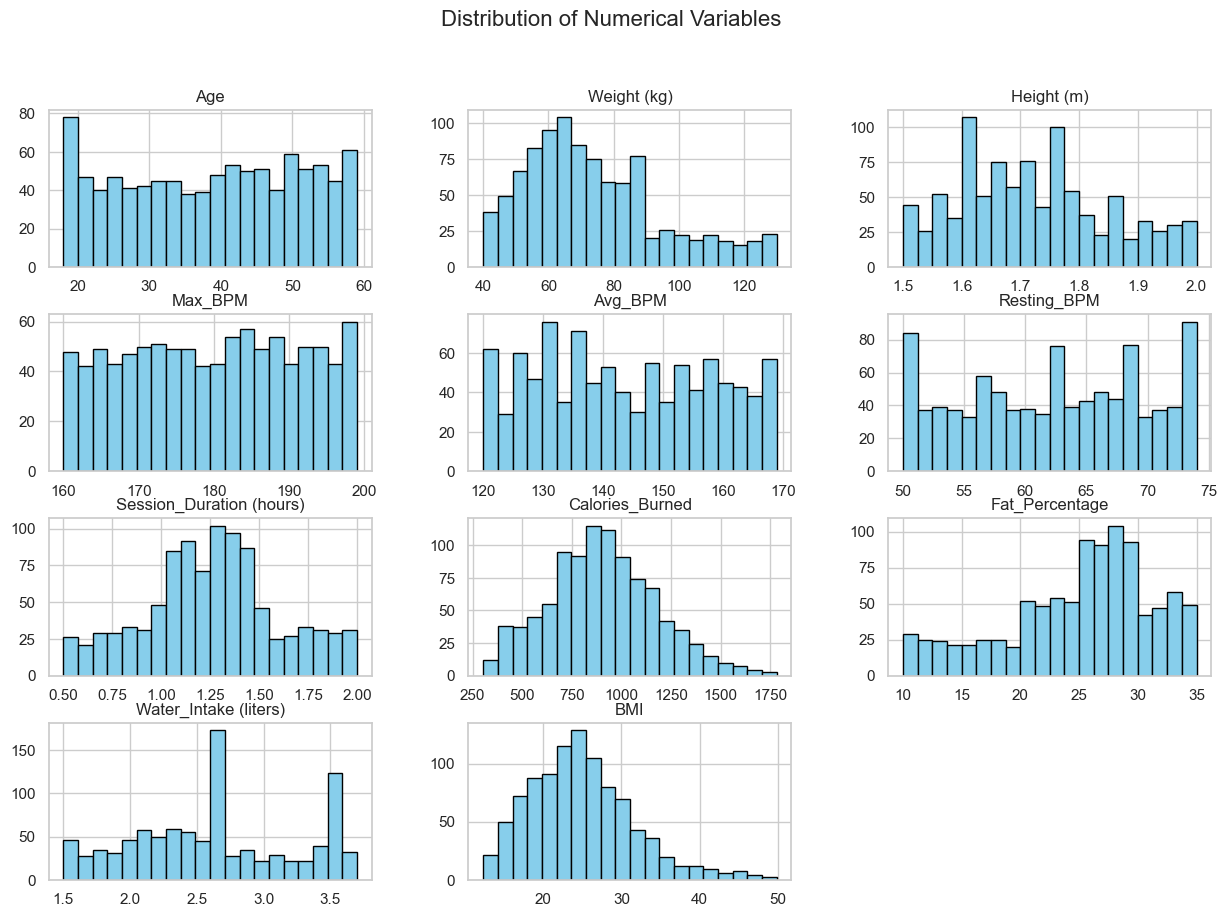

In [1382]:
# 1. Basic Statistics and Distribution of Numerical Variables: 

# Check distributions of numerical columns
numeric_columns = ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 
                   'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 
                   'Fat_Percentage', 'Water_Intake (liters)', 'BMI']

# Plot histograms for each numerical column
df[numeric_columns].hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Variables", fontsize=16)
plt.show()

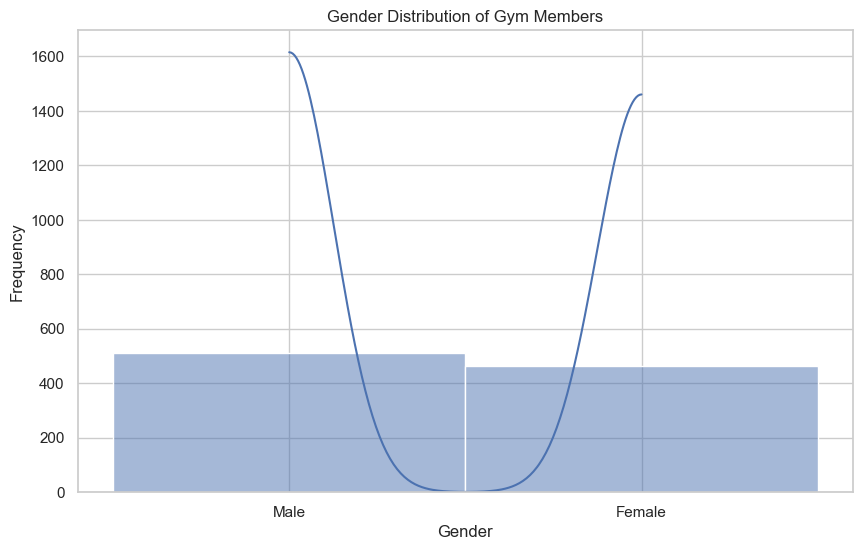

In [1383]:
# Gender Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Gender'], bins=15, kde=True)
plt.title('Gender Distribution of Gym Members')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

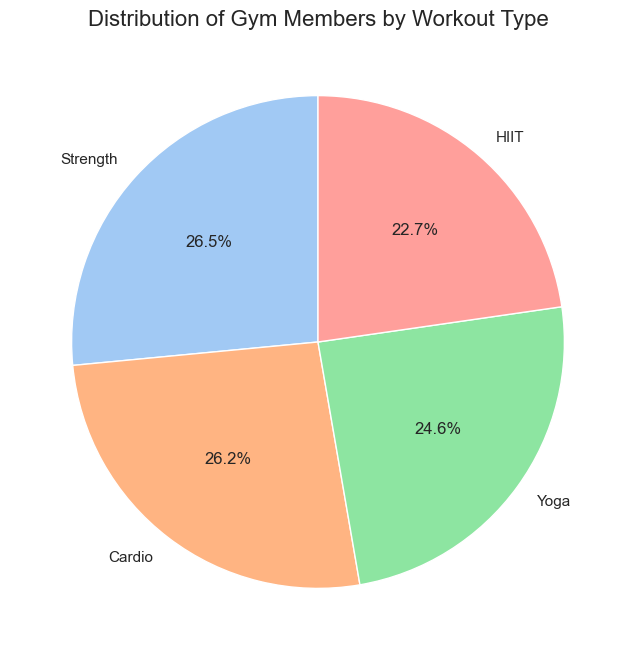

In [1384]:
# Pie chart of workout types
plt.figure(figsize=(8, 8))
workout_counts = df['Workout_Type'].value_counts()
workout_counts.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('pastel'),
    wedgeprops=dict(edgecolor='white')
)
plt.title("Distribution of Gym Members by Workout Type", fontsize=16)
plt.ylabel('')  # Hide the y-label
plt.show()

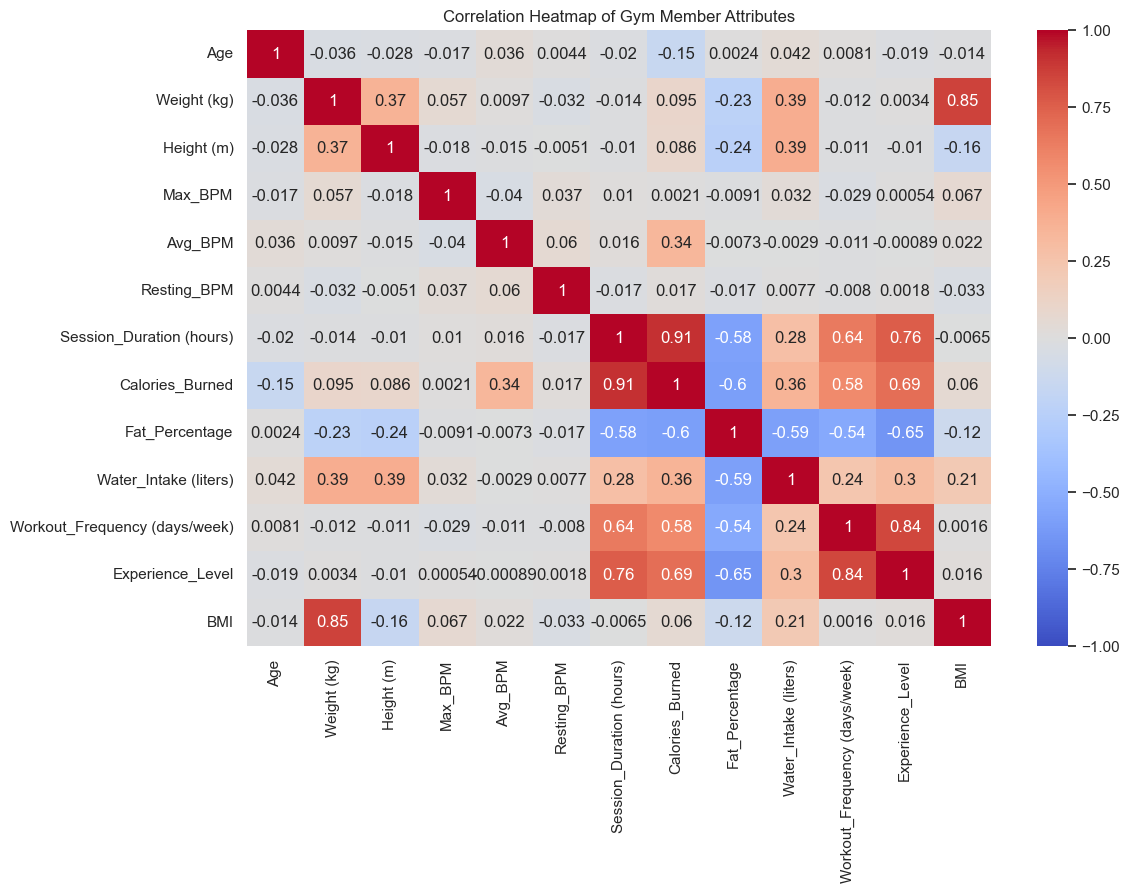

In [1385]:
#2. Correlation Analysis: 

# Select only numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

# Plotting the correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Gym Member Attributes")
plt.show()


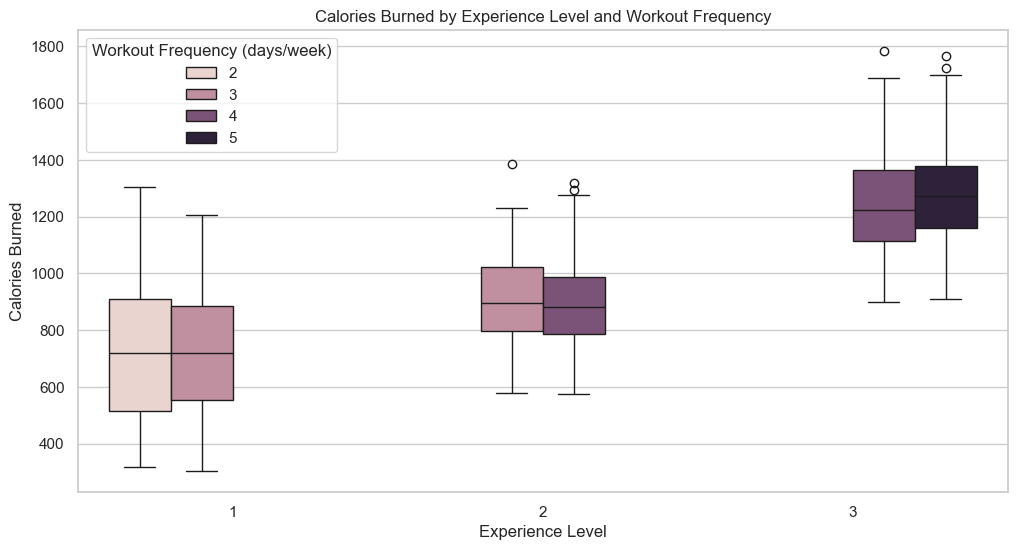

In [1386]:
# 3. Workout Frequency Analysis: 

# Calories burned by experience level and workout frequency
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Experience_Level', y='Calories_Burned', hue='Workout_Frequency (days/week)')
plt.title("Calories Burned by Experience Level and Workout Frequency")
plt.xlabel("Experience Level")
plt.ylabel("Calories Burned")
plt.legend(title='Workout Frequency (days/week)')
plt.show()

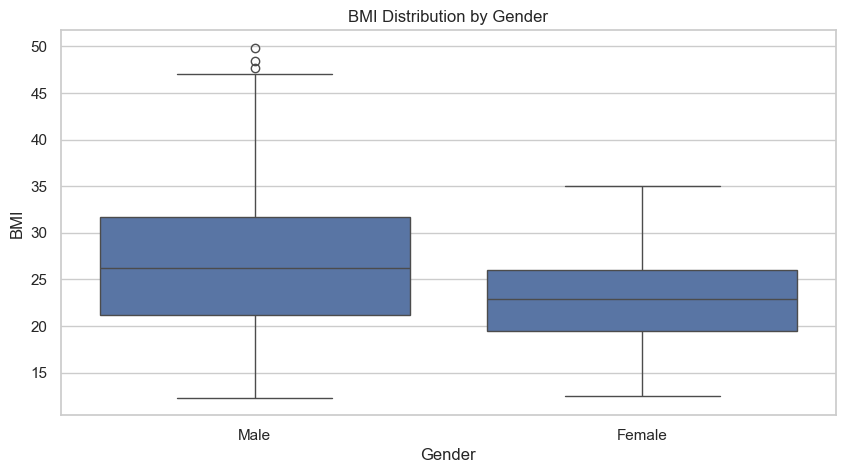

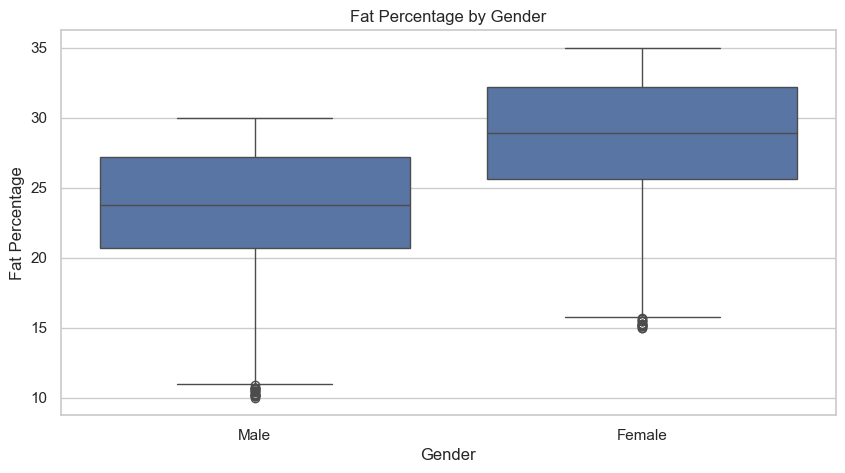

In [1387]:
# 4. Gender-Based Analysis:

# BMI comparison by gender
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Gender', y='BMI')
plt.title("BMI Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("BMI")
plt.show()

# Fat Percentage comparison by gender
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Gender', y='Fat_Percentage')
plt.title("Fat Percentage by Gender")
plt.xlabel("Gender")
plt.ylabel("Fat Percentage")
plt.show()


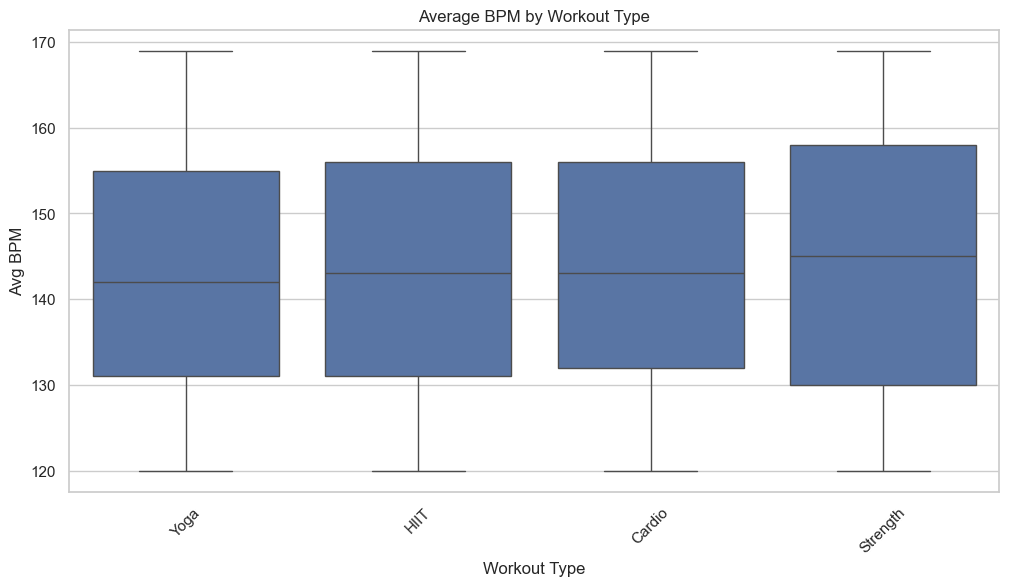

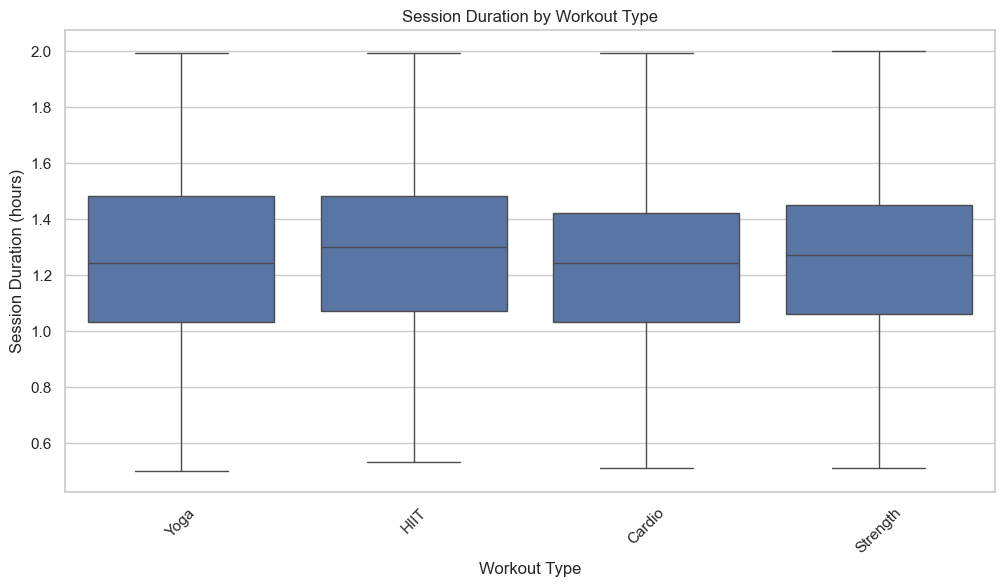

In [1388]:
# 5. Workout Type Analysis

# Avg BPM by Workout Type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Workout_Type', y='Avg_BPM')
plt.title("Average BPM by Workout Type")
plt.xlabel("Workout Type")
plt.ylabel("Avg BPM")
plt.xticks(rotation=45)
plt.show()

# Session duration by Workout Type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Workout_Type', y='Session_Duration (hours)')
plt.title("Session Duration by Workout Type")
plt.xlabel("Workout Type")
plt.ylabel("Session Duration (hours)")
plt.xticks(rotation=45)
plt.show()


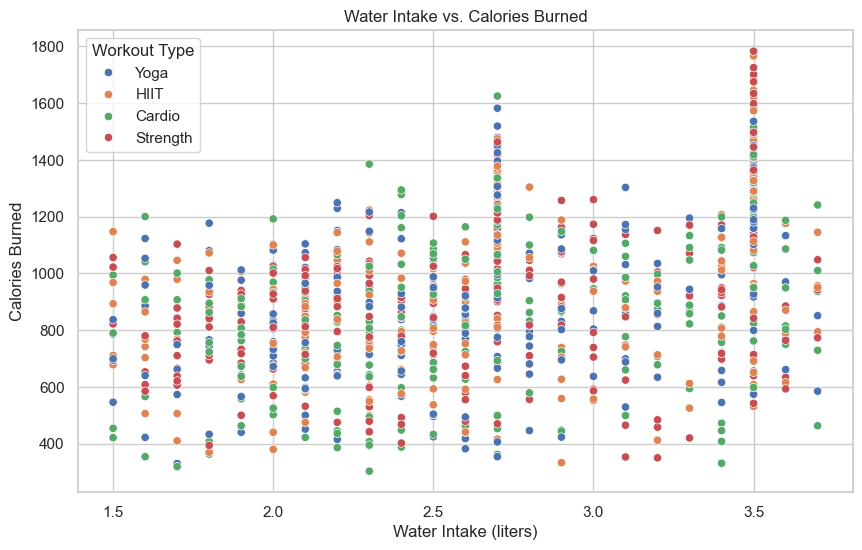

In [1389]:
# 6. Analysis of Water Intake

# Scatter plot for Water Intake and Calories Burned
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Water_Intake (liters)', y='Calories_Burned', hue='Workout_Type')
plt.title("Water Intake vs. Calories Burned")
plt.xlabel("Water Intake (liters)")
plt.ylabel("Calories Burned")
plt.legend(title="Workout Type")
plt.show()


C:\Users\mikel\AppData\Local\Temp\ipykernel_24328\2421426728.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Experience_Level', y='Age', palette='viridis')


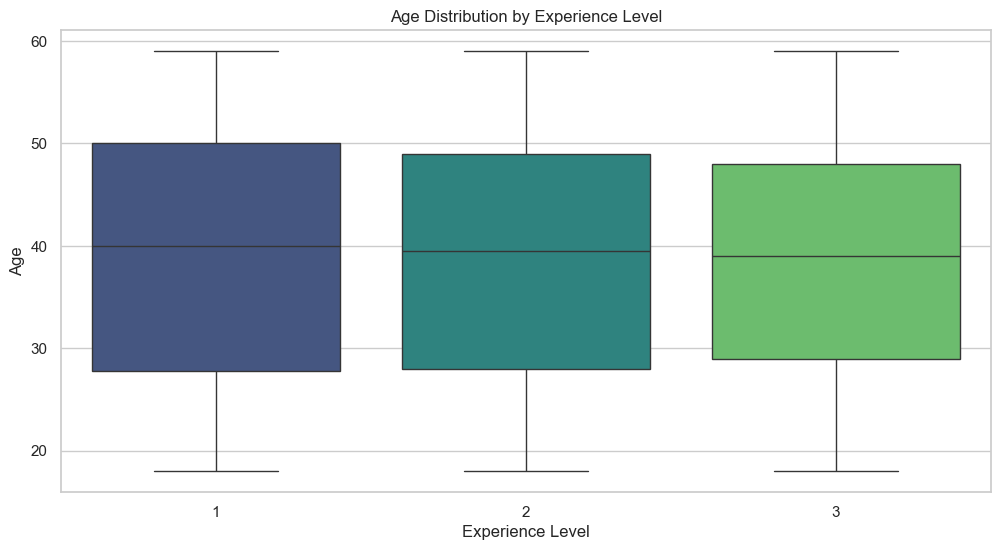

In [1390]:
# 7. Age Distribution by Experience Level

# Age distribution by experience level
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Experience_Level', y='Age', palette='viridis')
plt.title("Age Distribution by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Age")
plt.show()

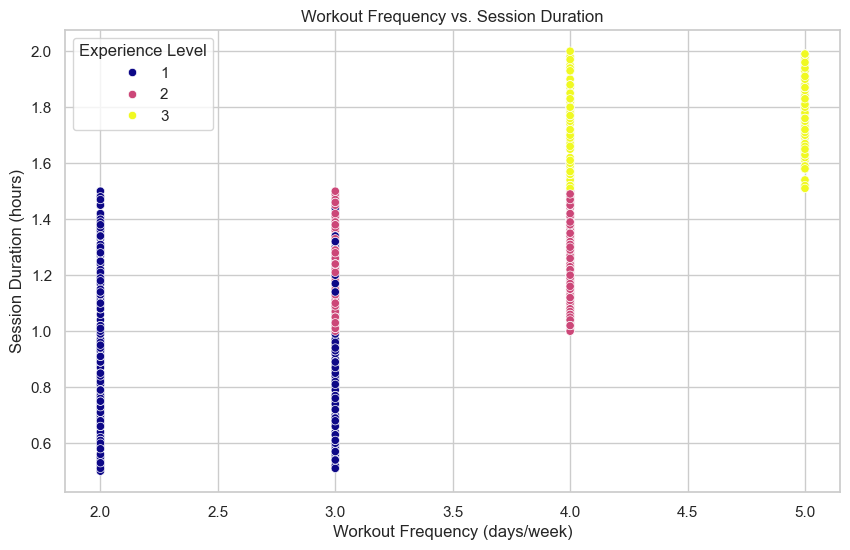

In [1391]:
# 8. Session Duration vs. Workout Frequency:

# Scatter plot for Session Duration and Workout Frequency
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Workout_Frequency (days/week)', y='Session_Duration (hours)', hue='Experience_Level', palette='plasma')
plt.title("Workout Frequency vs. Session Duration")
plt.xlabel("Workout Frequency (days/week)")
plt.ylabel("Session Duration (hours)")
plt.legend(title="Experience Level")
plt.show()

In [1392]:
# 9. Statistical Summary of Key Variables by Experience Level

# Group by Experience Level for a summary
experience_summary = df.groupby('Experience_Level').agg({
    'Age': ['mean', 'std'],
    'BMI': ['mean', 'std'],
    'Calories_Burned': ['mean', 'std'],
    'Fat_Percentage': ['mean', 'std'],
    'Session_Duration (hours)': ['mean', 'std']
})

# Display the summary
print(experience_summary)


                        Age                   BMI           Calories_Burned  \
                       mean        std       mean       std            mean   
Experience_Level                                                              
1                 38.917553  12.266425  24.624362  6.982564      726.375000   
2                 38.652709  12.308988  25.256034  7.342699      901.918719   
3                 38.287958  11.783834  24.747592  3.921239     1265.340314   

                             Fat_Percentage            \
                         std           mean       std   
Experience_Level                                        
1                 227.343301      27.634574  3.864288   
2                 152.645367      27.307389  3.896842   
3                 186.834501      14.790576  2.950649   

                 Session_Duration (hours)            
                                     mean       std  
Experience_Level                                     
1                   

C:\Users\mikel\AppData\Local\Temp\ipykernel_24328\1363659374.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Experience_Level', y=var, ax=axes[row, col], palette="viridis")
C:\Users\mikel\AppData\Local\Temp\ipykernel_24328\1363659374.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Experience_Level', y=var, ax=axes[row, col], palette="viridis")
C:\Users\mikel\AppData\Local\Temp\ipykernel_24328\1363659374.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Experience_Level', y=var, ax=axes[row, co

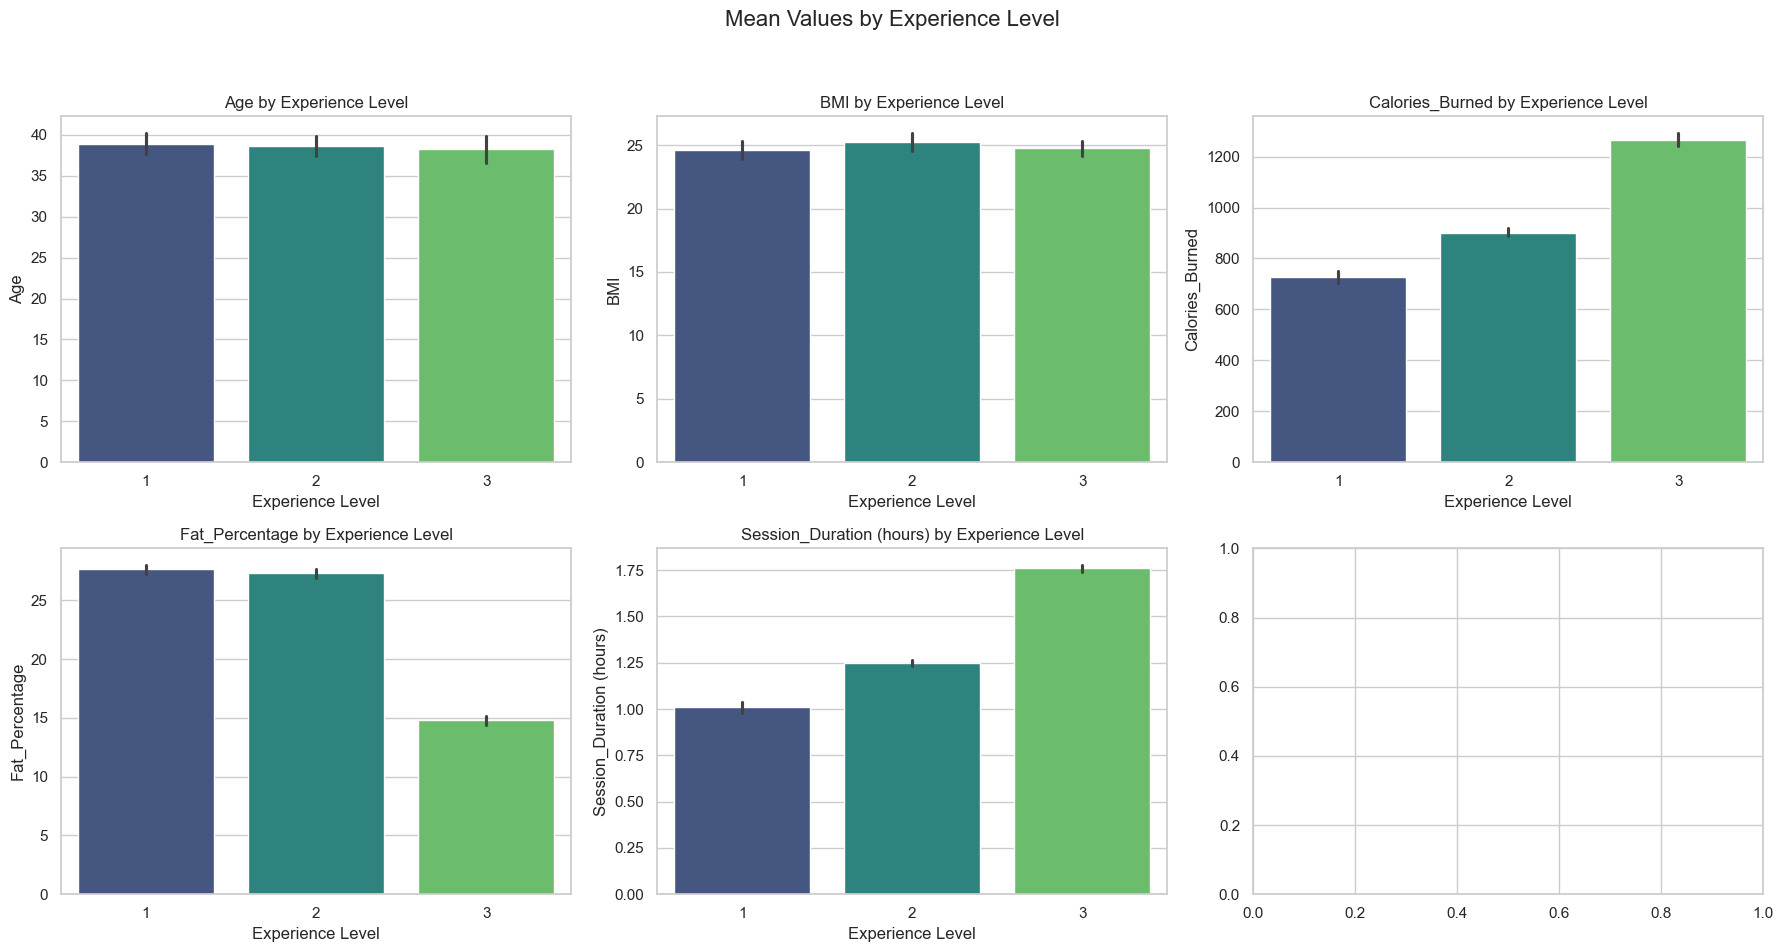

In [1393]:
# 9.1. Bar Plots for Mean Values by Experience Level:

# Set plot style
sns.set(style="whitegrid")

# Plot each variable by Experience_Level
variables = ['Age', 'BMI', 'Calories_Burned', 'Fat_Percentage', 'Session_Duration (hours)']
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Mean Values by Experience Level", fontsize=16)

# Loop over each variable to create bar plots
for i, var in enumerate(variables):
    row, col = divmod(i, 3)
    sns.barplot(data=df, x='Experience_Level', y=var, ax=axes[row, col], palette="viridis")
    axes[row, col].set_title(f"{var} by Experience Level")
    axes[row, col].set_xlabel("Experience Level")
    axes[row, col].set_ylabel(var)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



C:\Users\mikel\AppData\Local\Temp\ipykernel_24328\2728323590.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Experience_Level', y=var, ax=axes[row, col], palette="coolwarm")
C:\Users\mikel\AppData\Local\Temp\ipykernel_24328\2728323590.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Experience_Level', y=var, ax=axes[row, col], palette="coolwarm")
C:\Users\mikel\AppData\Local\Temp\ipykernel_24328\2728323590.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Experience_Level', y=var, ax=axes[row, 

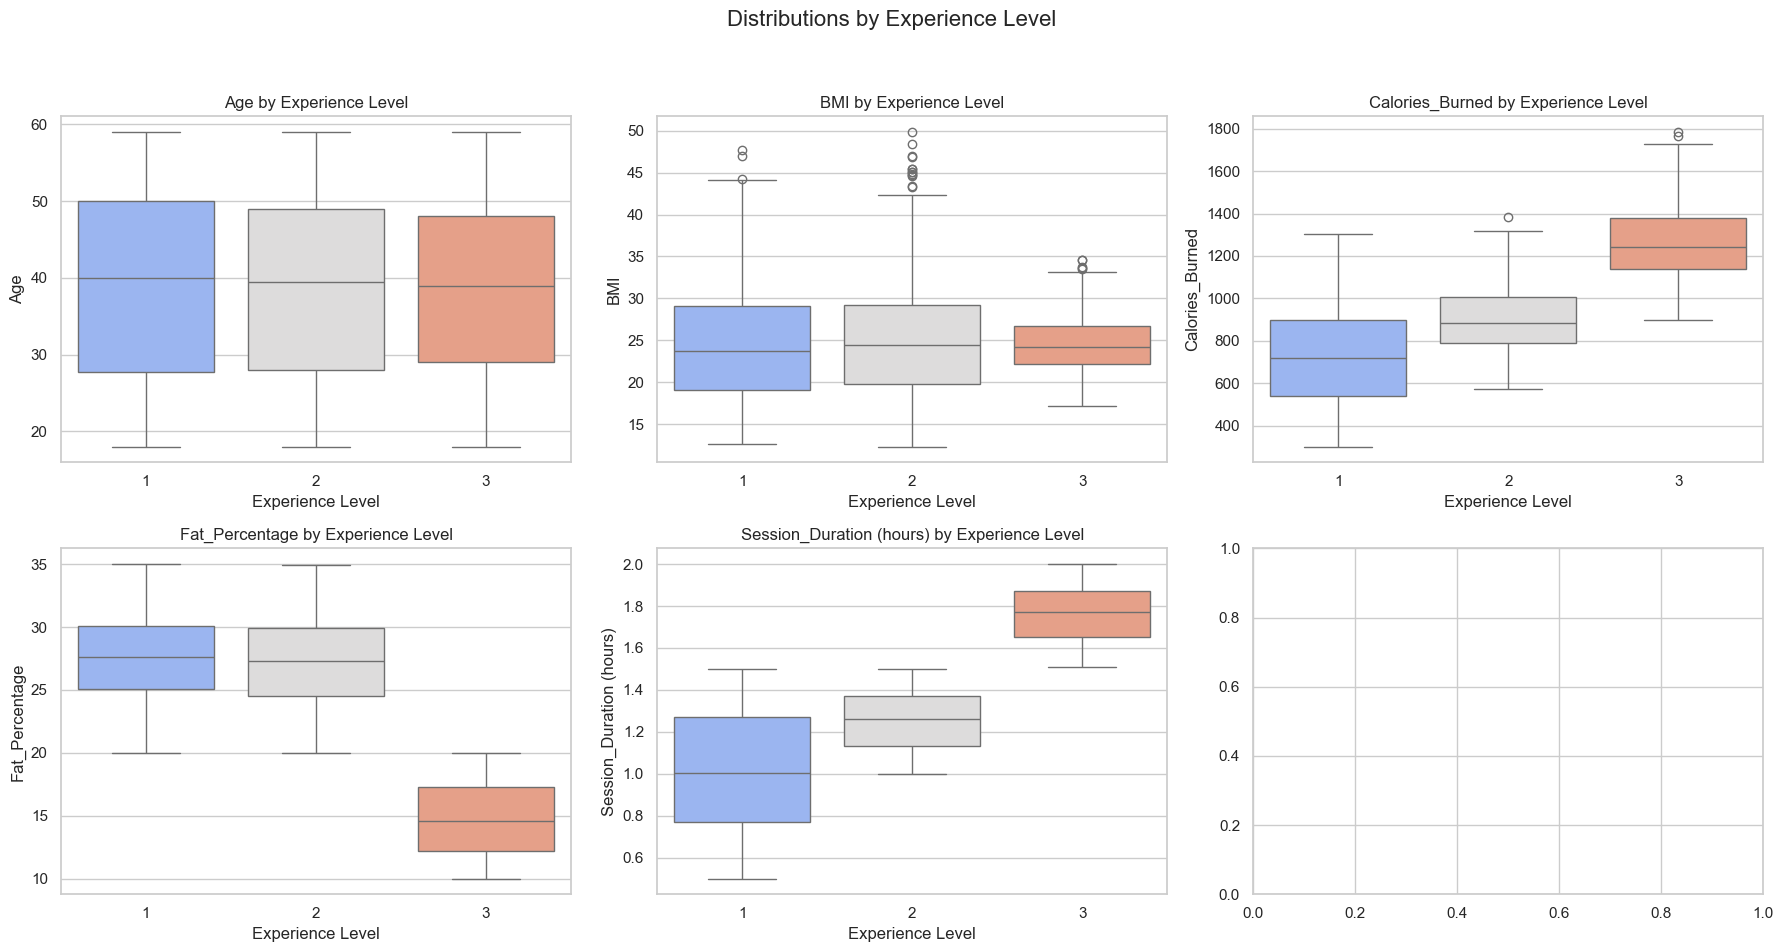

In [1394]:
# 9.2. Box Plots for Distributions by Experience Level:

# Plot each variable by Experience_Level using box plots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Distributions by Experience Level", fontsize=16)

# Loop over each variable to create box plots
for i, var in enumerate(variables):
    row, col = divmod(i, 3)
    sns.boxplot(data=df, x='Experience_Level', y=var, ax=axes[row, col], palette="coolwarm")
    axes[row, col].set_title(f"{var} by Experience Level")
    axes[row, col].set_xlabel("Experience Level")
    axes[row, col].set_ylabel(var)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

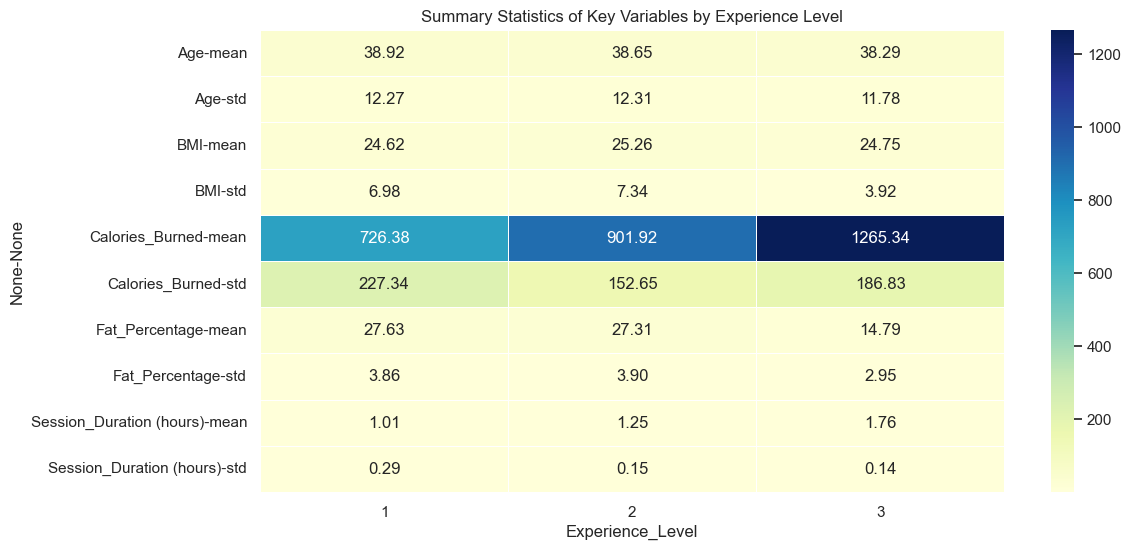

In [1395]:
# 9.3. Heatmap for Mean and Standard Deviation:

# Calculate the summary stats
experience_summary = df.groupby('Experience_Level').agg({
    'Age': ['mean', 'std'],
    'BMI': ['mean', 'std'],
    'Calories_Burned': ['mean', 'std'],
    'Fat_Percentage': ['mean', 'std'],
    'Session_Duration (hours)': ['mean', 'std']
}).round(2)  # Round for cleaner display

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(experience_summary.T, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5)
plt.title("Summary Statistics of Key Variables by Experience Level")
plt.show()


In [1396]:
# 1.Personal trainer
# 2.Dietary plans
# 3.Outdoor sports
#
#segmentacion porcentaje de grasa alto (dieta, personal trainer) bmi
#poca experiencia (personal trainer)
#poca frecuencia (encuesta plantear clases guiadas, deportes ...)
#fat vs bmi

In [1397]:
'''
To identify gym members with an unhealthy fat percentage, let’s first define what constitutes a "non-healthy" body fat range. The American Council on Exercise (ACE) provides general guidelines that vary by gender and age, but as a general rule of thumb:

For men: A body fat percentage over 25% is typically considered unhealthy.
For women: A body fat percentage over 32% is typically considered unhealthy.
Using this criteria, we can filter members with a fat percentage above these thresholds and then create visualizations.

Step 1: Add a "Non-Healthy" Column
We’ll create a new column in the DataFrame to flag members with non-healthy body fat percentages.
'''

# Assuming Gender column contains 'Male' and 'Female'
df['Non_Healthy_Fat'] = ((df['Gender'] == 'Male') & (df['Fat_Percentage'] > 25)) | \
                        ((df['Gender'] == 'Female') & (df['Fat_Percentage'] > 32))


C:\Users\mikel\AppData\Local\Temp\ipykernel_24328\802447126.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Non_Healthy_Fat', palette='coolwarm')


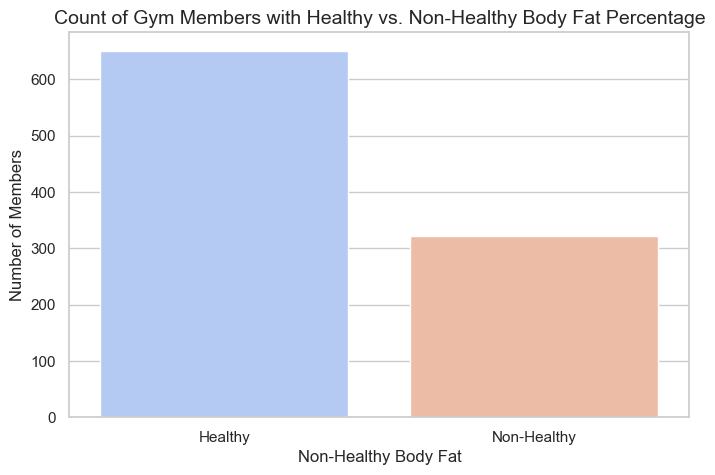

In [1398]:
'''
Step 2: Visualize the Distribution of Healthy vs. Non-Healthy Body Fat
1. Count Plot of Healthy vs. Non-Healthy Members
'''

import matplotlib.pyplot as plt
import seaborn as sns

# Count plot for healthy vs. non-healthy body fat percentage
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Non_Healthy_Fat', palette='coolwarm')
plt.title("Count of Gym Members with Healthy vs. Non-Healthy Body Fat Percentage", fontsize=14)
plt.xlabel("Non-Healthy Body Fat")
plt.ylabel("Number of Members")
plt.xticks([0, 1], ['Healthy', 'Non-Healthy'])
plt.show()


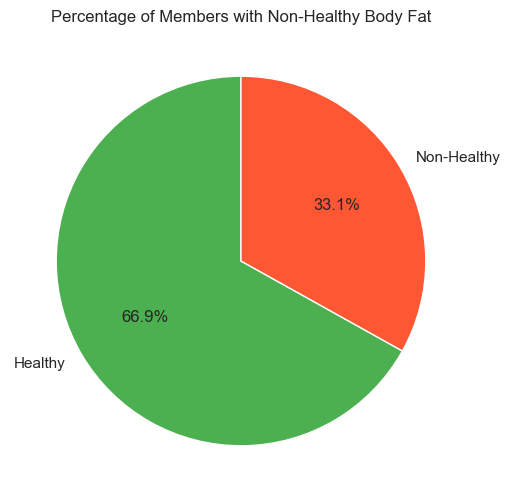

In [1399]:
# Pie chart for distribution of healthy and non-healthy members
plt.figure(figsize=(6, 6))
df['Non_Healthy_Fat'].value_counts().plot.pie(
    labels=['Healthy', 'Non-Healthy'], autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#FF5733']
)
plt.title("Percentage of Members with Non-Healthy Body Fat")
plt.ylabel('')
plt.show()


C:\Users\mikel\AppData\Local\Temp\ipykernel_24328\2342969616.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Non_Healthy_Fat', y='Fat_Percentage', palette='coolwarm')


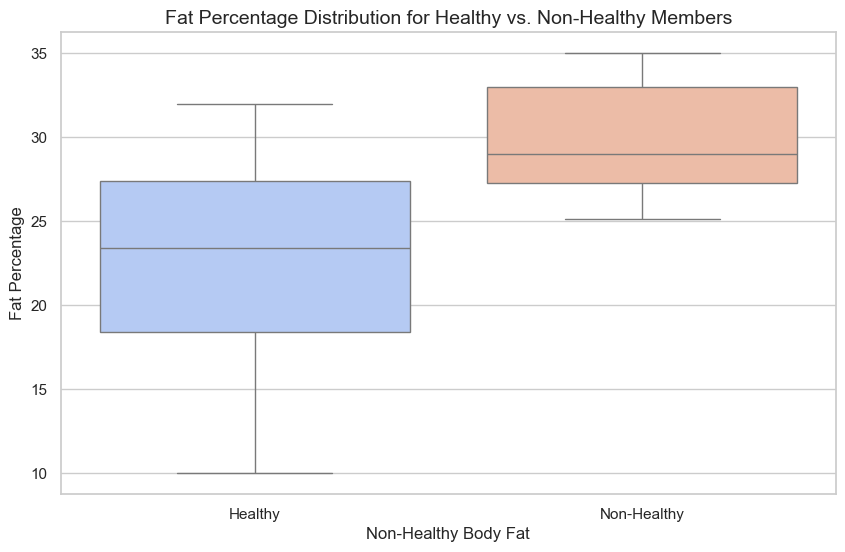

In [1400]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Non_Healthy_Fat', y='Fat_Percentage', palette='coolwarm')
plt.title("Fat Percentage Distribution for Healthy vs. Non-Healthy Members", fontsize=14)
plt.xlabel("Non-Healthy Body Fat")
plt.ylabel("Fat Percentage")
plt.xticks([0, 1], ['Healthy', 'Non-Healthy'])
plt.show()


In [1401]:
'''
To check if all members with an unhealthy Body Mass Index (BMI) are related to an unhealthy fat percentage, we first need to define what constitutes an "unhealthy" BMI. The World Health Organization (WHO) defines the BMI categories as follows:

Underweight: BMI < 18.5
Normal weight: 18.5 ≤ BMI < 24.9
Overweight: 25 ≤ BMI < 29.9
Obesity: BMI ≥ 30
For the purpose of this analysis, we'll consider a BMI of 25 and above as "unhealthy."

Steps:
Identify members with unhealthy BMI.
Check the relationship with their fat percentage.
Summarize the results.
'''

'\nTo check if all members with an unhealthy Body Mass Index (BMI) are related to an unhealthy fat percentage, we first need to define what constitutes an "unhealthy" BMI. The World Health Organization (WHO) defines the BMI categories as follows:\n\nUnderweight: BMI < 18.5\nNormal weight: 18.5 ≤ BMI < 24.9\nOverweight: 25 ≤ BMI < 29.9\nObesity: BMI ≥ 30\nFor the purpose of this analysis, we\'ll consider a BMI of 25 and above as "unhealthy."\n\nSteps:\nIdentify members with unhealthy BMI.\nCheck the relationship with their fat percentage.\nSummarize the results.\n'

In [1402]:
# Step 1: Define unhealthy BMI threshold
unhealthy_bmi_threshold = 25

# Step 2: Create a new column for unhealthy BMI
df['Unhealthy_BMI'] = df['BMI'] >= unhealthy_bmi_threshold

# Step 3: Create a new column for unhealthy fat percentage based on gender
df['Unhealthy_Fat'] = ((df['Gender'] == 'Male') & (df['Fat_Percentage'] > 25)) | \
                      ((df['Gender'] == 'Female') & (df['Fat_Percentage'] > 32))

# Step 4: Check relationship
# Filtering for members with unhealthy BMI
unhealthy_bmi_members = df[df['Unhealthy_BMI']]

# Checking how many of them have unhealthy fat percentage
unhealthy_fat_count = unhealthy_bmi_members['Unhealthy_Fat'].sum()
total_unhealthy_bmi_count = unhealthy_bmi_members.shape[0]

# Step 5: Print results
print(f"Total members with unhealthy BMI: {total_unhealthy_bmi_count}")
print(f"Members with unhealthy fat percentage: {unhealthy_fat_count}")
print(f"Percentage of unhealthy BMI members with unhealthy fat percentage: {unhealthy_fat_count / total_unhealthy_bmi_count * 100:.2f}%")


Total members with unhealthy BMI: 435
Members with unhealthy fat percentage: 157
Percentage of unhealthy BMI members with unhealthy fat percentage: 36.09%


In [1403]:
'''
To visually analyze the relationship between BMI and fat percentage categories, we can create a contingency table and a heatmap to show how many members fall into each combination of healthy/unhealthy BMI and healthy/unhealthy fat percentage.

Steps to Visualize the Relationship:
Create a Contingency Table: This will summarize the counts of members in each category.
Generate a Heatmap: A heatmap provides a visual representation of the contingency table.
Step 1: Create the Contingency Table
'''

'\nTo visually analyze the relationship between BMI and fat percentage categories, we can create a contingency table and a heatmap to show how many members fall into each combination of healthy/unhealthy BMI and healthy/unhealthy fat percentage.\n\nSteps to Visualize the Relationship:\nCreate a Contingency Table: This will summarize the counts of members in each category.\nGenerate a Heatmap: A heatmap provides a visual representation of the contingency table.\nStep 1: Create the Contingency Table\n'

In [1404]:
# Create a contingency table
contingency_table = pd.crosstab(df['Unhealthy_BMI'], df['Unhealthy_Fat'], 
                                 rownames=['Unhealthy BMI'], colnames=['Unhealthy Fat'])

# Display the contingency table
print(contingency_table)


Unhealthy Fat  False  True 
Unhealthy BMI              
False            373    165
True             278    157


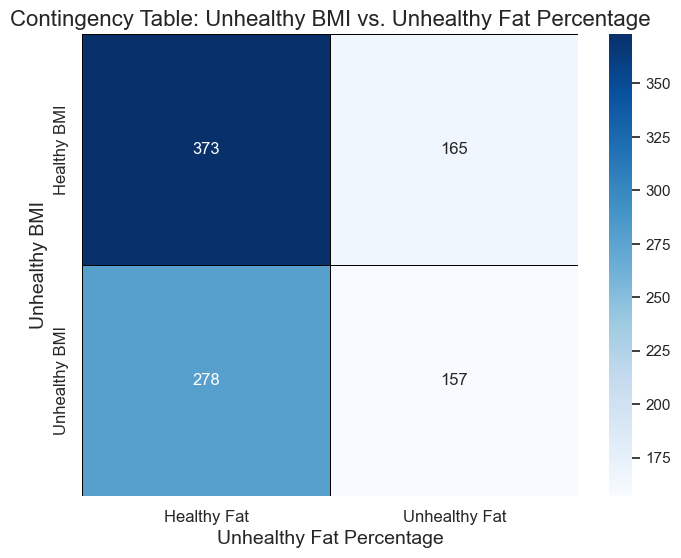

In [1405]:
# Set the style for the heatmap
sns.set(style='whitegrid')

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues', cbar=True, 
            linewidths=0.5, linecolor='black')

# Add titles and labels
plt.title("Contingency Table: Unhealthy BMI vs. Unhealthy Fat Percentage", fontsize=16)
plt.xlabel("Unhealthy Fat Percentage", fontsize=14)
plt.ylabel("Unhealthy BMI", fontsize=14)
plt.xticks(ticks=[0.5, 1.5], labels=['Healthy Fat', 'Unhealthy Fat'], fontsize=12)
plt.yticks(ticks=[0.5, 1.5], labels=['Healthy BMI', 'Unhealthy BMI'], fontsize=12)
plt.show()



To analyze the less experienced gym members and identify those who may benefit from the assistance of a personal trainer, we can filter the dataset based on the experience level and then analyze their key metrics (such as BMI, fat percentage, and workout frequency).

Assuming that the experience level is categorized as integers (e.g., 1 for beginners, 2 for intermediate, and so on), we can filter out the beginners (or those with the least experience) and then visualize their statistics. Below is the code to achieve this:

Step 1: Filter Less Experienced Members

In [1406]:
# Define the threshold for less experienced members
# Assuming experience levels are categorized with 1 being the least experienced
less_experienced_threshold = 1

# Filter less experienced members
less_experienced_members = df[df['Experience_Level'] == less_experienced_threshold]

# Display their statistics
print(less_experienced_members[['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'BMI', 
                                 'Fat_Percentage', 'Water_Intake (liters)', 
                                 'Workout_Frequency (days/week)']])


     Age  Gender  Weight (kg)  Height (m)    BMI  Fat_Percentage  \
3     25    Male         53.2        1.70  18.41            28.8   
4     38    Male         46.1        1.79  14.39            29.2   
9     28    Male        101.8        1.84  30.07            29.7   
10    41    Male        120.8        1.67  43.31            20.5   
13    41    Male         94.5        2.00  23.62            27.6   
..   ...     ...          ...         ...    ...             ...   
960   19  Female         69.2        1.60  27.03            32.4   
963   57  Female         43.8        1.75  14.30            25.1   
965   23  Female         44.1        1.62  16.80            25.7   
969   25    Male         66.6        1.61  25.69            25.0   
972   46    Male         88.7        1.63  33.38            28.8   

     Water_Intake (liters)  Workout_Frequency (days/week)  
3                      2.1                              3  
4                      2.8                              3  
9  

Step 2: Visualize Key Metrics for Less Experienced Members
To visualize the key metrics, we can create a few plots. Here’s an example of how to visualize their BMI and fat percentage distributions.

2.1. Histogram of BMI

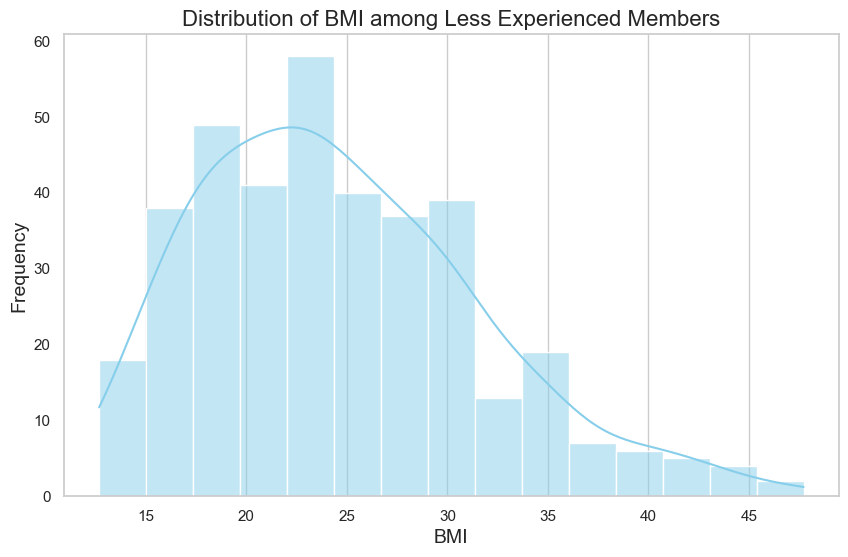

In [1407]:
# Plotting histogram for BMI
plt.figure(figsize=(10, 6))
sns.histplot(less_experienced_members['BMI'], bins=15, kde=True, color='skyblue')
plt.title("Distribution of BMI among Less Experienced Members", fontsize=16)
plt.xlabel("BMI", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y')
plt.show()


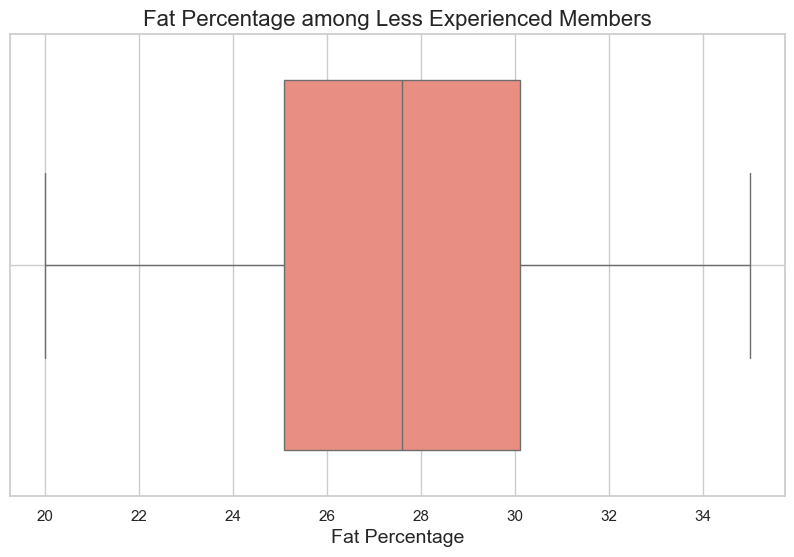

In [1408]:
# Plotting boxplot for Fat Percentage
plt.figure(figsize=(10, 6))
sns.boxplot(data=less_experienced_members, x='Fat_Percentage', color='salmon')
plt.title("Fat Percentage among Less Experienced Members", fontsize=16)
plt.xlabel("Fat Percentage", fontsize=14)
plt.grid(axis='y')
plt.show()


C:\Users\mikel\AppData\Local\Temp\ipykernel_24328\750469098.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=less_experienced_members, x='Workout_Frequency (days/week)', palette='viridis')


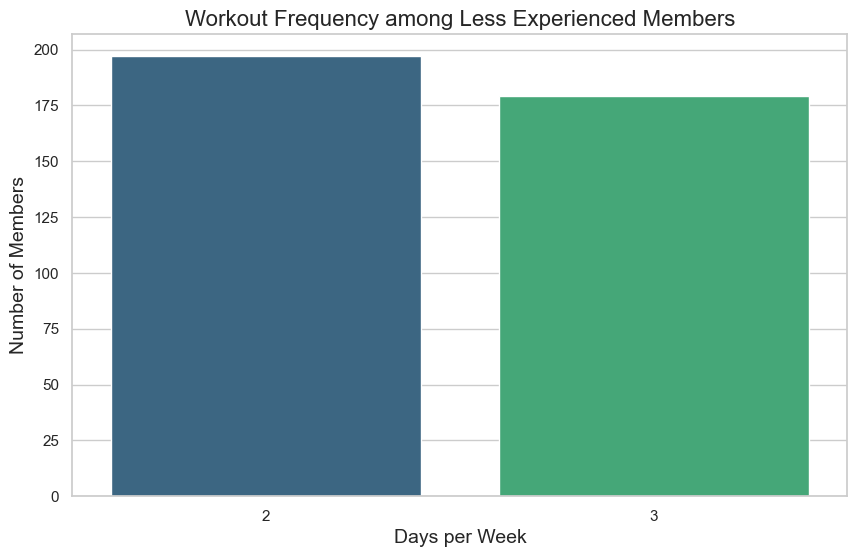

In [1409]:
# Plotting bar plot for Workout Frequency
plt.figure(figsize=(10, 6))
sns.countplot(data=less_experienced_members, x='Workout_Frequency (days/week)', palette='viridis')
plt.title("Workout Frequency among Less Experienced Members", fontsize=16)
plt.xlabel("Days per Week", fontsize=14)
plt.ylabel("Number of Members", fontsize=14)
plt.xticks(rotation=0)
plt.show()


C:\Users\mikel\AppData\Local\Temp\ipykernel_24328\355303994.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Workout_Type', y='Calories_Burned', palette='Set2')


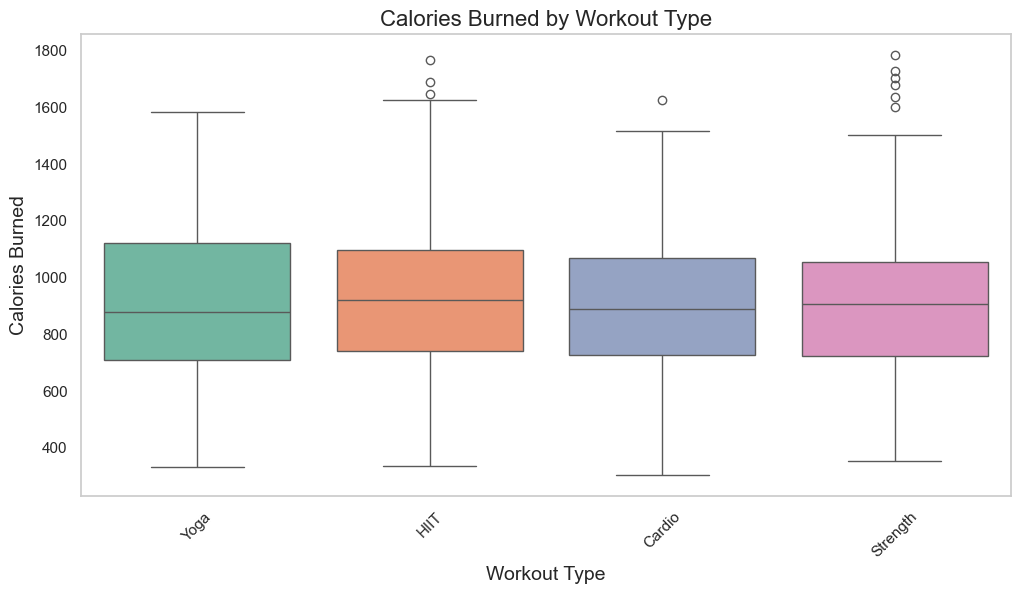

In [1410]:
# Set the style for the plot
sns.set(style='whitegrid')

# Create a box plot for Calories Burned vs Workout Type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Workout_Type', y='Calories_Burned', palette='Set2')

# Add titles and labels
plt.title("Calories Burned by Workout Type", fontsize=16)
plt.xlabel("Workout Type", fontsize=14)
plt.ylabel("Calories Burned", fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')

# Show the plot
plt.show()


To achieve both fat loss and muscle gain, it's important to focus on a combination of strength training and cardiovascular exercises. Here’s a list of some of the best exercises in both categories:

Strength Training Exercises
These exercises help build muscle mass, which in turn increases your resting metabolic rate, aiding fat loss.

Squats

Works: Quadriceps, hamstrings, glutes, and core.
Variations: Back squats, front squats, goblet squats.
Deadlifts

Works: Hamstrings, glutes, lower back, and core.
Variations: Conventional deadlifts, sumo deadlifts, Romanian deadlifts.
Bench Press

Works: Chest, shoulders, and triceps.
Variations: Barbell bench press, dumbbell bench press, incline/decline bench press.
Overhead Press

Works: Shoulders, upper chest, and triceps.
Variations: Standing barbell press, seated dumbbell press.
Pull-Ups / Chin-Ups

Works: Back, biceps, and forearms.
Variations: Assisted pull-ups, wide grip, close grip.
Bent-Over Rows

Works: Back, biceps, and core.
Variations: Barbell rows, dumbbell rows, T-bar rows.
Lunges

Works: Quadriceps, hamstrings, glutes, and core.
Variations: Forward lunges, reverse lunges, lateral lunges.
Planks

Works: Core, shoulders, and glutes.
Variations: Side planks, forearm planks, plank with leg lift.
Cardiovascular Exercises
Cardio helps burn calories and improve cardiovascular health, aiding in fat loss.

High-Intensity Interval Training (HIIT)

Short bursts of intense exercise followed by rest or low-intensity periods.
Can include sprints, cycling, or bodyweight exercises like burpees.
Running / Jogging

Excellent for burning calories and improving endurance.
Can be done outdoors or on a treadmill.
Cycling

Great for fat burning and lower body strength.
Options include stationary cycling or outdoor biking.
Swimming

Full-body workout that’s easy on the joints and excellent for cardiovascular fitness.
Jump Rope

Effective for improving coordination and burning calories.
Group Fitness Classes

Classes like Zumba, kickboxing, or spin can be fun ways to get in cardio while working on strength.
Combining Strength and Cardio
For optimal results in fat loss and muscle gain, consider combining these workouts in a balanced routine. Here are some strategies:

Circuit Training: Alternate between strength and cardio exercises in a single workout session.
Weight Training with Cardio: Do weight training first to maximize strength gains, followed by a short cardio session to burn additional calories.
Frequency: Aim for 3-4 days of strength training and 2-3 days of cardio each week, adjusting based on your fitness level and goals.
Nutrition and Recovery
Remember that exercise alone isn't enough; nutrition plays a crucial role in fat loss and muscle gain. Focus on:

Protein Intake: Essential for muscle repair and growth. Aim for lean protein sources like chicken, fish, eggs, legumes, and dairy.
Balanced Diet: Include plenty of fruits, vegetables, whole grains, and healthy fats to support overall health and energy levels.
Hydration: Stay hydrated before, during, and after workouts.
Rest and Recovery: Allow muscles time to recover through rest days and adequate sleep.
Conclusion
A well-rounded approach that includes both strength training and cardiovascular exercises, along with proper nutrition and recovery, will be most effective for fat loss and muscle gain. Tailor your workouts to your preferences and lifestyle to help maintain consistency and motivation. If you need help creating a specific workout plan or routine, feel free to ask!

In [1411]:
# Define a threshold for high fat percentage (adjust as needed)
high_fat_threshold = 30

# Filter clients with high fat percentage
high_fat_clients = df[df['Fat_Percentage'] > high_fat_threshold]

# Display the filtered clients
print("Clients with High Fat Percentage:")
print(high_fat_clients)

# Optionally, save to a new CSV file for dietary planning
high_fat_clients.to_csv('high_fat_clients.csv', index=False)


Clients with High Fat Percentage:
     Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
1     46  Female         74.9        1.53      179      151           66   
2     32  Female         68.1        1.66      167      122           54   
7     40  Female         69.7        1.51      189      141           64   
17    41  Female         43.8        1.77      182      165           58   
18    47  Female         66.8        1.75      199      146           56   
..   ...     ...          ...         ...      ...      ...          ...   
946   57  Female         75.6        1.67      186      153           65   
953   50  Female         67.9        1.77      171      164           73   
956   50  Female         51.8        1.50      182      141           58   
960   19  Female         69.2        1.60      186      155           74   
961   31  Female         66.6        1.67      184      137           71   

     Session_Duration (hours)  Calories_Burned Workou

In [1412]:
# Define fat percentage thresholds for men and women
fat_percentage_thresholds = {
    'Male': {
        'low': 15,
        'medium': 20,
        'high': 25
    },
    'Female': {
        'low': 25,
        'medium': 30,
        'high': 35
    }
}

# Filter clients by gender and fat percentage
target_clients = {}

for gender, thresholds in fat_percentage_thresholds.items():
    target_clients[gender] = {
        'Low Fat': df[(df['Gender'] == gender) & (df['Fat_Percentage'] <= thresholds['low'])],
        'Medium Fat': df[(df['Gender'] == gender) & 
                         (df['Fat_Percentage'] > thresholds['low']) & 
                         (df['Fat_Percentage'] <= thresholds['medium'])],
        'High Fat': df[(df['Gender'] == gender) & (df['Fat_Percentage'] > thresholds['medium'])]
    }

# Display the results
for gender, clients in target_clients.items():
    print(f"\n{gender} Clients:")
    for category, df_clients in clients.items():
        print(f"\n{category} Fat Percentage Clients:")
        print(df_clients)

# Optionally, save the filtered clients to CSV files
for gender, clients in target_clients.items():
    for category, df_clients in clients.items():
        df_clients.to_csv(f'{gender}_{category.replace(" ", "_").lower()}_clients.csv', index=False)



Male Clients:

Low Fat Fat Percentage Clients:
     Age Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0     56   Male         88.3        1.71      180      157           60   
28    45   Male         84.9        1.86      186      136           66   
34    38   Male         81.4        1.71      187      148           58   
51    53   Male         84.2        1.76      165      137           69   
62    27   Male         87.5        1.63      183      135           74   
..   ...    ...          ...         ...      ...      ...          ...   
943   59   Male         85.5        1.67      190      144           71   
954   40   Male         87.9        1.87      196      134           54   
962   57   Male         83.4        1.65      172      166           67   
966   23   Male         87.3        1.91      164      129           58   
968   24   Male         87.1        1.74      187      158           67   

     Session_Duration (hours)  Calories_Burned Work